# **RP-Specialist Diploma in Applied Artificial Intelligence**

### **C3879C Capstone Project**

##### **Name:** Wong Qi Yuan, Jeffrey
##### **Student ID:** 20053371

### **Ensemble Machine Learning for Early Diagnosis of Obesity**

### **Problem Statement:**

In a recent report, the World Health Organization (WHO) mentioned that obesity-related chronic diseases have contributed to approximately about 41 million premature deaths
annually, which is about 71% of all death worldwide. If the situation is unmitigated, we are expected that the overall number of obesity-related chronic diseases related-deaths to be
increased up to 52 million yearly by the end of 2030. The most common obesity-related chronic diseases are the obesity, diabetes, and the hypertension.

Furthermore, as the world currently facing the crisis of the COVID-19 pandemic, hence it is expected that the number of people developing the obesity-related chronic diseases to rise
as most people are working from home in order to curb the spread of the COVID-19 in the local community. Furthermore, based on a recent news article, about 1/3 of the Singaporeans
have gained weight during the COVID-19 pandemic and many fingers point their fingers at how their lifestyles have changed to become more sedentary since the COVID-19 pandemic.

Thus, it is an alarming concern in the road of the covid-19 pandemic as the majority of the people are unaware of their overall health status and some of the people do not have a little
bit of time to go for a simple health screening.

### **Import Libraries**

In [ ]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, PowerTransformer, MinMaxScaler, StandardScaler, QuantileTransformer
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

### **(A) Ingesting Insights: Loading and Preparing the Dataset for Analytical Exploration**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the obesity datafile from the Google drive
obesity_df = pd.read_csv('/content/drive/MyDrive/rp_capstone_project/obesity.csv')

In [ ]:
# display the first few rows of data
obesity_df.head()

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_level
0,Female,21,1.62,64.0,yes,no,2,3,2,no,2,no,0,1,1,public_transportation,2
1,Female,21,1.52,56.0,yes,no,3,3,2,yes,3,yes,3,0,2,public_transportation,2
2,Male,23,1.80,77.0,yes,no,2,3,2,no,2,no,2,1,3,public_transportation,2
3,Male,27,1.80,87.0,no,no,3,3,2,no,2,no,2,0,3,walking,3
4,Male,22,1.78,89.8,no,no,2,1,2,no,2,no,0,0,2,public_transportation,4


In [ ]:
# display the data information
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2111 non-null   object 
 1   age                             2111 non-null   int64  
 2   height                          2111 non-null   float64
 3   weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   caloric_food                    2111 non-null   object 
 6   vegetables                      2111 non-null   int64  
 7   number_meals                    2111 non-null   int64  
 8   food_between_meals              2111 non-null   int64  
 9   smoke                           2111 non-null   object 
 10  water                           2111 non-null   int64  
 11  calories                        2111 non-null   object 
 12  activity                        21

### **(B) Refining Raw Potential: Unveiling the Art of Data Preprocessing for Enhanced Model Performance**

In [ ]:
# rename the target column
obesity_df.rename({'obesity_level': 'obesity_class'}, axis = 1, inplace = True)

In [ ]:
# check for missing values
obesity_df.isnull().sum()

gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
caloric_food                      0
vegetables                        0
number_meals                      0
food_between_meals                0
smoke                             0
water                             0
calories                          0
activity                          0
technology                        0
alcohol                           0
transportation                    0
obesity_class                     0
dtype: int64

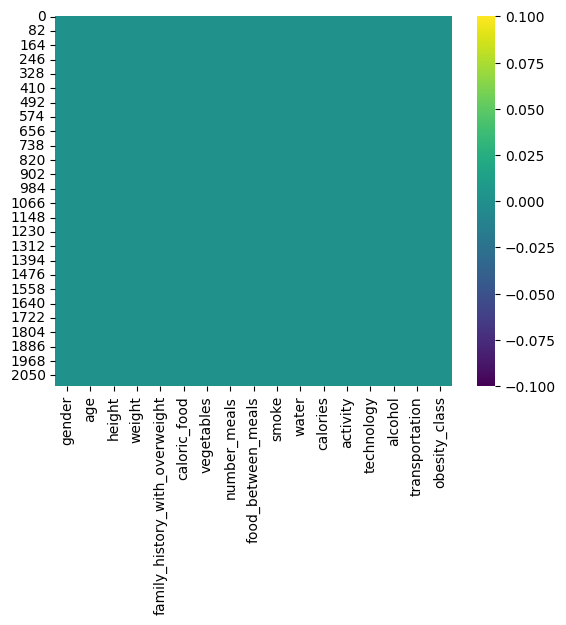

In [ ]:
# use heatmap to visualize the presence of missing values
sns.heatmap(obesity_df.isnull(), annot = False, cmap = 'viridis')
plt.show()

In [ ]:
# create new columns
obesity_df['bmi'] = obesity_df['weight'] / obesity_df['height']**2
obesity_df.head(5)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi
0,Female,21,1.62,64.0,yes,no,2,3,2,no,2,no,0,1,1,public_transportation,2,24.386526
1,Female,21,1.52,56.0,yes,no,3,3,2,yes,3,yes,3,0,2,public_transportation,2,24.238227
2,Male,23,1.80,77.0,yes,no,2,3,2,no,2,no,2,1,3,public_transportation,2,23.765432
3,Male,27,1.80,87.0,no,no,3,3,2,no,2,no,2,0,3,walking,3,26.851852
4,Male,22,1.78,89.8,no,no,2,1,2,no,2,no,0,0,2,public_transportation,4,28.342381


In [ ]:
# convert the num values to cat values for the respective categorical columns
# categorical columns: vegetables, food_between_meals, water, activity, technology, alcohol, obesity_class

obesity_df['vegetables'] = obesity_df['vegetables'].map({1: 'not always', 2: 'frequently', 3: 'often'})
obesity_df['food_between_meals'] = obesity_df['food_between_meals'].map({1: 'not always', 2: 'sometimes', 3: 'frequently', 4: 'always'})
obesity_df['water'] = obesity_df['water'].map({1: 'not always', 2: 'sometimes', 3: 'frequently'})
obesity_df['activity'] = obesity_df['activity'].map({0: 'not always', 1: 'sometimes', 2: 'frequently', 3: 'always'})
obesity_df['technology'] = obesity_df['technology'].map({0: 'sometimes', 1: 'frequently', 2: 'often'})
obesity_df['alcohol'] = obesity_df['alcohol'].map({1: 'not always', 2: 'sometimes', 3: 'frequently', 4: 'always'})
obesity_df['obesity_class'] = obesity_df['obesity_class'].map({1: 'underweight', 2: 'normal_weight', 3: 'overweight', 4: 'overweight', 5: 'obesity_type_I', 6: 'obesity_type_II', 7: 'obesity_type_III'})

In [ ]:
obesity_df.head()

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi
0,Female,21,1.62,64.0,yes,no,frequently,3,sometimes,no,sometimes,no,not always,frequently,not always,public_transportation,normal_weight,24.386526
1,Female,21,1.52,56.0,yes,no,often,3,sometimes,yes,frequently,yes,always,sometimes,sometimes,public_transportation,normal_weight,24.238227
2,Male,23,1.80,77.0,yes,no,frequently,3,sometimes,no,sometimes,no,frequently,frequently,frequently,public_transportation,normal_weight,23.765432
3,Male,27,1.80,87.0,no,no,often,3,sometimes,no,sometimes,no,frequently,sometimes,frequently,walking,overweight,26.851852
4,Male,22,1.78,89.8,no,no,frequently,1,sometimes,no,sometimes,no,not always,sometimes,sometimes,public_transportation,overweight,28.342381


##### **Check the following obesity class and BMI in the obesity dataframe matches the CDC overweight and obesity requirements.**

**CDC Requirements:**

- If your BMI is less than 18.5, it falls within the **underweight** range.

- If your BMI is 18.5 to < 25, it falls within the **healthy weight** range.

- If your BMI is 25.0 to < 30, it falls within the **overweight** range.

- If your BMI is 30.0 or higher, it falls within the **obesity** range.

**Obesity is sub-divided into the following category:**

- **Class 1:** BMI of 30 to < 35

- **Class 2:** BMI of 35 to < 40

- **Class 3:** BMI of 40 or higher

**Source: https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=Obesity%20is%20frequently%20subdivided%20into,BMI%20of%2040%20or%20higher.**

In [ ]:
def corrected_obesity_class(bmi):
  if bmi < 18.5:
    corrected_class = 'underweight'
  elif bmi >= 18.5 and bmi < 25.0:
    corrected_class = 'normal_weight'
  elif bmi >= 25.0 and bmi < 30.0:
    corrected_class = 'overweight'
  elif bmi >= 30.0 and bmi < 35.0:
    corrected_class = 'obesity_type_I'
  elif bmi >= 35.0 and bmi < 40.0:
    corrected_class = 'obesity_type_II'
  elif bmi >= 40:
    corrected_class = 'obesity_type_III'
  return corrected_class


In [ ]:
# create a function to verify the violation of the underweight range
def check_underweight_range(obesity_df):
  # create a boolean mask to filter rows based on multiple conditions that to verify the violation of the underweight range
  mask_obs_underweight = ((obesity_df['obesity_class'] == 'underweight') & (obesity_df['bmi'] > 18.5))
  res_obs_underweight = obesity_df[mask_obs_underweight]
  return res_obs_underweight

In [ ]:
# create a function to verify the violation of the normal weight range
def check_normal_weight_range(obesity_df):
  # create a boolean mask to filter rows based on multiple conditions to verify the violation of the normal weight range
  mask_obs_normalweight = ((obesity_df['obesity_class'] == 'normal_weight') & (obesity_df['bmi'] >= 25.0)) | ((obesity_df['obesity_class'] == 'normal_weight') & (obesity_df['bmi'] < 18.5))
  res_obs_normalweight = obesity_df[mask_obs_normalweight]
  return res_obs_normalweight


In [ ]:
# create a function to verify the violation of the overweight range
def check_overweight_range(obesity_df):
  # create a boolean mask to filter rows based on multiple conditions that violated the overweight range
  mask_obs_overweight = ((obesity_df['obesity_class'] == 'normal_weight') & (obesity_df['bmi'] >= 30.0)) | ((obesity_df['obesity_class'] == 'overweight') & (obesity_df['bmi'] < 25.0))
  res_obs_overweight = obesity_df[mask_obs_overweight]
  return res_obs_overweight

In [ ]:
# create a function to verify the violation of the obesity type i range
def check_obesity_type_I_range(obesity_df):
  # create a boolean mask to filter rows based on multiple conditions that violated the obesity class I range
  mask_obs_type_i = ((obesity_df['obesity_class'] == 'obesity_type_I') & (obesity_df['bmi'] >= 35)) | ((obesity_df['obesity_class'] == 'obesity_type_I') & (obesity_df['bmi'] < 30))
  res_obs_type_i = obesity_df[mask_obs_type_i]
  return res_obs_type_i

In [ ]:
# create a function to verify the violation of the obesity type ii range
def check_obesity_type_II_range(obesity_df):
  # create a boolean mask to filter rows based on multiple conditions that vioplated the obesity class II range
  mask_obs_type_ii = ((obesity_df['obesity_class'] == 'obesity_type_II') & (obesity_df['bmi'] >= 40)) | ((obesity_df['obesity_class'] == 'obesity_type_II') & (obesity_df['bmi'] < 35))
  res_obs_type_ii = obesity_df[mask_obs_type_ii]
  return res_obs_type_ii

In [ ]:
# create a function to verify the violation of the obesity type iii range
def check_obesity_type_III_range(obesity_df):
  # create a boolean mask to filter rows based on multiple conditions that violated the obesity class III range
  mask_obs_type_iii = ((obesity_df['obesity_class'] == 'obesity_type_III') & (obesity_df['bmi'] < 40))
  res_obs_type_iii = obesity_df[mask_obs_type_iii]
  return res_obs_type_iii

In [ ]:
# call the function to verify the violation of the underweight range
check_underweight_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi
524,Female,20,1.550648,44.641796,no,yes,often,3,frequently,no,not always,no,sometimes,sometimes,sometimes,public_transportation,underweight,18.565866
549,Female,30,1.610863,49.516027,yes,yes,frequently,4,frequently,no,sometimes,no,sometimes,sometimes,not always,public_transportation,underweight,19.082206
564,Male,18,1.793926,59.682591,yes,yes,frequently,4,sometimes,no,sometimes,no,frequently,sometimes,not always,automobile,underweight,18.545503
567,Female,22,1.699568,54.987740,yes,yes,often,3,frequently,no,sometimes,no,not always,frequently,not always,public_transportation,underweight,19.036573


In [ ]:
# call the function to verify the violation of the normal weight range
check_normal_weight_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi
318,Female,25,1.56,45.0,no,yes,frequently,3,sometimes,no,not always,no,not always,sometimes,sometimes,public_transportation,normal_weight,18.491124
331,Male,17,1.74,56.0,yes,yes,frequently,3,sometimes,no,sometimes,no,frequently,frequently,not always,public_transportation,normal_weight,18.496499
497,Male,20,1.56,45.0,no,no,frequently,3,sometimes,no,sometimes,no,sometimes,frequently,sometimes,public_transportation,normal_weight,18.491124


In [ ]:
# call the function to verify the violation of the overweight range
check_overweight_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi
782,Female,33,1.721903,72.748903,yes,yes,frequently,3,sometimes,no,not always,no,not always,frequently,sometimes,automobile,overweight,24.536301
784,Female,16,1.551288,54.932420,no,yes,not always,1,sometimes,no,sometimes,yes,not always,frequently,sometimes,public_transportation,overweight,22.826739
786,Female,24,1.588597,62.339003,no,yes,frequently,3,sometimes,no,sometimes,no,frequently,often,sometimes,public_transportation,overweight,24.702015
789,Female,37,1.593894,63.320629,yes,yes,frequently,3,sometimes,no,sometimes,no,always,sometimes,sometimes,automobile,overweight,24.924494
813,Female,42,1.768231,75.629310,yes,yes,often,3,sometimes,no,sometimes,no,not always,sometimes,sometimes,automobile,overweight,24.188678
866,Female,18,1.498561,55.376512,no,yes,frequently,3,sometimes,no,not always,yes,not always,sometimes,sometimes,public_transportation,overweight,24.659073
875,Female,16,1.644053,67.439589,yes,yes,not always,1,sometimes,no,not always,yes,not always,sometimes,not always,public_transportation,overweight,24.950732
892,Female,17,1.535618,57.259124,no,yes,not always,2,sometimes,no,not always,yes,not always,frequently,sometimes,public_transportation,overweight,24.281657
905,Male,20,1.849425,85.228116,yes,yes,frequently,3,sometimes,no,sometimes,no,sometimes,frequently,sometimes,public_transportation,overweight,24.917785
951,Female,17,1.489409,53.620604,no,yes,not always,1,sometimes,no,sometimes,yes,not always,frequently,sometimes,public_transportation,overweight,24.171508


In [ ]:
# call the function to verify the violation of the obesity type I range
check_obesity_type_I_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi
1228,Male,26,1.753321,107.998815,yes,yes,often,3,sometimes,no,sometimes,no,frequently,sometimes,sometimes,automobile,obesity_type_I,35.131454
1240,Female,23,1.665199,83.151150,yes,yes,frequently,1,sometimes,no,sometimes,no,not always,frequently,not always,public_transportation,obesity_type_I,29.987204
1242,Female,39,1.507867,79.589580,yes,yes,frequently,3,sometimes,no,not always,no,not always,sometimes,sometimes,automobile,obesity_type_I,35.005005
1304,Male,30,1.758189,108.721893,yes,yes,often,3,sometimes,no,not always,no,frequently,sometimes,sometimes,automobile,obesity_type_I,35.171095
1435,Female,23,1.661715,82.595793,yes,yes,not always,1,sometimes,no,frequently,no,not always,often,sometimes,public_transportation,obesity_type_I,29.911958


In [ ]:
# call the function to verify the violation of the obesity type II range
check_obesity_type_II_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi
1524,Male,25,1.885543,121.253083,yes,yes,frequently,3,sometimes,no,frequently,no,sometimes,sometimes,sometimes,public_transportation,obesity_type_II,34.105146
1540,Male,30,1.899588,124.269251,yes,yes,frequently,3,sometimes,no,frequently,no,sometimes,sometimes,sometimes,public_transportation,obesity_type_II,34.438549
1552,Male,35,1.733250,103.669116,yes,yes,often,2,sometimes,no,not always,no,frequently,sometimes,not always,automobile,obesity_type_II,34.508571
1569,Male,27,1.863883,120.202596,yes,yes,frequently,3,sometimes,no,frequently,no,sometimes,sometimes,sometimes,public_transportation,obesity_type_II,34.600036
1577,Male,26,1.872517,120.898397,yes,yes,frequently,3,sometimes,no,frequently,no,sometimes,frequently,sometimes,public_transportation,obesity_type_II,34.480139
1579,Male,23,1.876898,121.277832,yes,yes,often,3,sometimes,no,sometimes,no,sometimes,sometimes,sometimes,public_transportation,obesity_type_II,34.427072
1587,Male,25,1.858265,117.574570,yes,yes,frequently,3,sometimes,no,frequently,no,sometimes,sometimes,sometimes,public_transportation,obesity_type_II,34.048509
1595,Male,24,1.873368,121.829620,yes,yes,often,3,sometimes,no,sometimes,no,sometimes,sometimes,sometimes,public_transportation,obesity_type_II,34.714163
1645,Male,25,1.874519,121.244969,yes,yes,often,3,sometimes,no,frequently,no,sometimes,sometimes,sometimes,public_transportation,obesity_type_II,34.505159
1658,Male,30,1.699354,100.176866,yes,yes,often,2,sometimes,no,not always,no,sometimes,frequently,not always,public_transportation,obesity_type_II,34.689635


In [ ]:
# call the function to verify the violation of the obesity type III range
check_obesity_type_III_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi
498,Female,25,1.686306,104.572712,yes,yes,often,3,sometimes,no,not always,no,not always,frequently,sometimes,public_transportation,obesity_type_III,36.774400
505,Female,26,1.629191,104.826776,yes,yes,often,3,sometimes,no,frequently,no,not always,frequently,sometimes,public_transportation,obesity_type_III,39.493737
1799,Female,26,1.611462,102.093223,yes,yes,often,3,sometimes,no,not always,no,not always,frequently,sometimes,public_transportation,obesity_type_III,39.314864
1805,Female,26,1.678658,104.954834,yes,yes,often,3,sometimes,no,sometimes,no,not always,frequently,sometimes,public_transportation,obesity_type_III,37.245859
1806,Female,26,1.678201,109.900472,yes,yes,often,3,sometimes,no,not always,no,not always,sometimes,sometimes,public_transportation,obesity_type_III,39.022187
1816,Female,24,1.719365,114.511537,yes,yes,often,3,sometimes,no,frequently,no,not always,frequently,sometimes,public_transportation,obesity_type_III,38.735849
1819,Female,26,1.654875,104.758713,yes,yes,often,3,sometimes,no,frequently,no,not always,frequently,sometimes,public_transportation,obesity_type_III,38.252495
1824,Female,26,1.607128,103.026858,yes,yes,often,3,sometimes,no,not always,no,not always,frequently,sometimes,public_transportation,obesity_type_III,39.888667
1829,Female,26,1.669701,104.585783,yes,yes,often,3,sometimes,no,sometimes,no,not always,frequently,sometimes,public_transportation,obesity_type_III,37.514161
1830,Female,26,1.668709,104.754958,yes,yes,often,3,sometimes,no,not always,no,not always,frequently,sometimes,public_transportation,obesity_type_III,37.619530


In [ ]:
# update the obesity class column by applying the corrected obesity class based on BMI values
obesity_df['obesity_class'] = obesity_df['bmi'].apply(lambda x: corrected_obesity_class(x))

In [ ]:
# call the function to verify the violation of the underweight range
check_underweight_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi


In [ ]:
# call the function to verify the violation of the overweight range
check_overweight_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi


In [ ]:
# call the function to verify the violation of the normal weight range
check_normal_weight_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi


In [ ]:
# call the function to verify the violation of the obesity type I range
check_obesity_type_I_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi


In [ ]:
# call the function to verify the violation of the obesity type II range
check_obesity_type_II_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi


In [ ]:
# call the function to verify the violation of the obesity type III range
check_obesity_type_III_range(obesity_df)

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_class,bmi


##### **Extract the numerical and categorical column names**

In [ ]:
# extract the numerical and categorical column names, respectively
num_col_names = obesity_df.select_dtypes(include = ['float64', 'int64']).columns
cat_col_names = obesity_df.select_dtypes(include = ['bool', 'object']).columns

print("Numerical Column Names: " + str(num_col_names))
print("Categorical Column Names: " + str(cat_col_names))

Numerical Column Names: Index(['age', 'height', 'weight', 'number_meals', 'bmi'], dtype='object')
Categorical Column Names: Index(['gender', 'family_history_with_overweight', 'caloric_food',
       'vegetables', 'food_between_meals', 'smoke', 'water', 'calories',
       'activity', 'technology', 'alcohol', 'transportation', 'obesity_class'],
      dtype='object')


### **(C) Strategic Segmentation: Optimizing Model Performance through Effective Data Splitting**

In [ ]:
# splitting the dataset into features (X) and target variable (y)
X = obesity_df.drop('obesity_class', axis = 1)
y = obesity_df['obesity_class']

# creating an instance of stratifiedkfold
stratified_k_fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# iterating through the folds generated by stratifiedkfold
for train_index, test_index in stratified_k_fold.split(X, y):
  # splitting the data into training and testing sets based on the current fold indices
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1689, 17)
(422, 17)
(1689,)
(422,)


In [ ]:
y_train.value_counts()

overweight          453
obesity_type_I      295
obesity_type_II     271
normal_weight       240
underweight         216
obesity_type_III    214
Name: obesity_class, dtype: int64

### **(D) Unveiling Insight: Navigating Numerical Features through Exploratory Feature Analysis - Detecting Outliers, Gaussian Distribution Analysis, and the Art of Normalization and Scaling**

**Numerical Features: Age, Height, Weight, Number of Meals, and BMI**

In [ ]:
# make a copy of numerical feature training data for exploration purpose
X_train_exploration = X_train.copy()

In [ ]:
# create a function to view histogram for numerical features
def view_histogram(numerical_data):
  plt.figure(figsize = (10, 5))
  plt.subplot(2, 3, 1)
  sns.histplot(x = "age", data = numerical_data, color = "crimson", edgecolor = "black", linewidth = 1, kde = False, bins = 10)
  plt.title("Histogram of Age (in years)", fontweight = "bold")
  plt.xlabel("Age (in year)", fontweight = "bold")
  plt.ylabel("Number of People", fontweight = "bold")
  plt.legend(labels = ['age'])

  plt.subplot(2, 3, 2)
  sns.histplot(x = "height", data = numerical_data, color = "limegreen", edgecolor = "black", linewidth = 1, kde = False, bins = 10)
  plt.title("Histogram of Height (in cm)", fontweight = "bold")
  plt.xlabel("Height (in cm)", fontweight = "bold")
  plt.ylabel("Number of People", fontweight = "bold")
  plt.legend(labels = ["height"])

  plt.subplot(2, 3, 3)
  sns.histplot(x = "weight", data = numerical_data, color = "gold", edgecolor = "black", linewidth = 1, kde = False, bins = 10)
  plt.title("Histogram of Weight (in kg)", fontweight = "bold")
  plt.xlabel("Weight (in kg)", fontweight = "bold")
  plt.ylabel("Number of People", fontweight = "bold")
  plt.legend(labels = ["weight"])

  plt.subplot(2, 3, 4)
  sns.histplot(x = "number_meals", data = numerical_data, color = "silver", edgecolor = "black", linewidth = 1, kde = False)
  plt.title("Histogram of Number of Meals", fontweight = "bold")
  plt.xlabel("Number of Meals", fontweight = "bold")
  plt.ylabel("Number of People", fontweight = "bold")
  plt.legend(labels = ["number_meals"])

  plt.subplot(2, 3, 5)
  sns.histplot(x = "bmi", data = numerical_data, color = "skyblue", edgecolor = "black", linewidth = 1, kde = False, bins = 10)
  plt.title("Histogram of BMI ", fontweight = "bold")
  plt.xlabel("BMI", fontweight = "bold")
  plt.ylabel("Number of People", fontweight = "bold")
  plt.legend(labels = ["bmi"])

  plt.tight_layout()
  plt.show()

In [ ]:
# create a function to view boxplot
def view_boxplot(numerical_data):
  # to identify the potential outliers for each numerical feature
  plt.figure(figsize = (10, 5))
  plt.subplot(2, 3, 1)
  sns.boxplot(y = "age", data = numerical_data, color = "crimson", linewidth = 1)
  plt.title("Boxplot of Age (in years)", fontweight = "bold")
  plt.ylabel("Age (in year)", fontweight = "bold")

  plt.subplot(2, 3, 2)
  sns.boxplot(y = "height", data = numerical_data, color = "limegreen", linewidth = 1)
  plt.title("Boxplot of Height (in cm)", fontweight = "bold")
  plt.ylabel("Height (in cm)", fontweight = "bold")

  plt.subplot(2, 3, 3)
  sns.boxplot(y = "weight", data = numerical_data, color = "gold", linewidth = 1)
  plt.title("Boxplot of Weight (in kg)", fontweight = "bold")
  plt.ylabel("Weight (in kg)", fontweight = "bold")

  plt.subplot(2, 3, 4)
  sns.boxplot(y = "number_meals", data = numerical_data, color = "silver", linewidth = 1)
  plt.title("Boxplot of Number of Meals", fontweight = "bold")
  plt.ylabel("Number of Meals", fontweight = "bold")

  plt.subplot(2, 3, 5)
  sns.boxplot(y = "bmi", data = numerical_data, color = "skyblue", linewidth = 1)
  plt.title("Boxplot of BMI", fontweight = "bold")
  plt.ylabel("BMI", fontweight = "bold")

  plt.tight_layout()
  plt.show()

#### **Before Applying Normalization and Scaling**

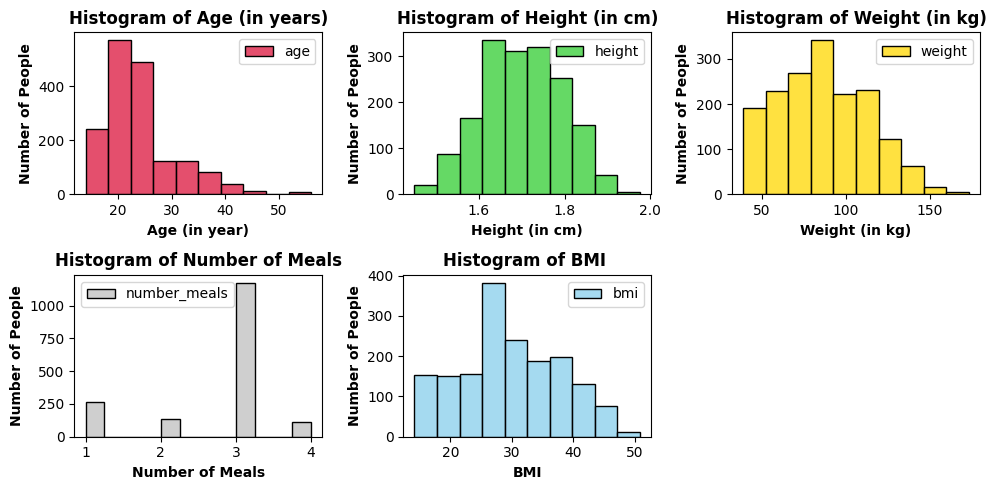

In [ ]:
# call the function to view the histogram
view_histogram(X_train_exploration)

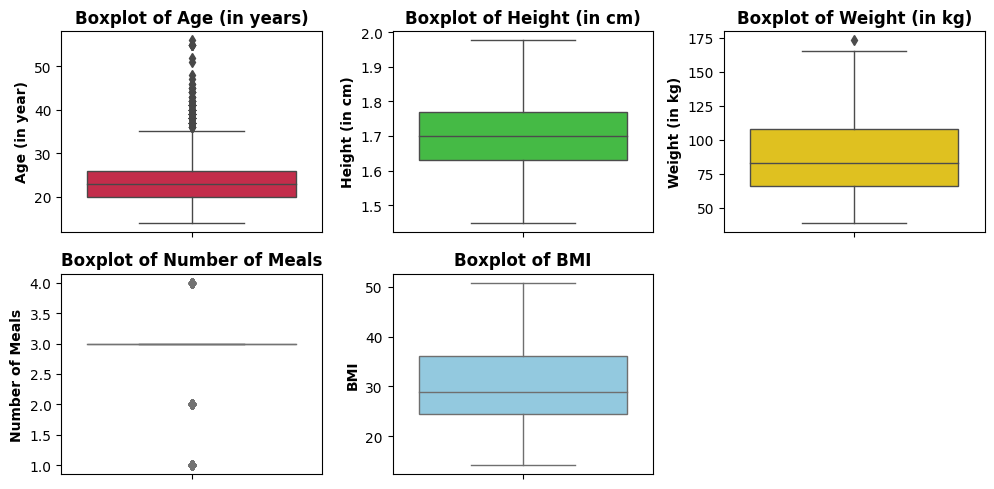

In [ ]:
# call the function to view the boxplot
view_boxplot(X_train_exploration)

#### **After Applying Normalization and Scaling**

##### **(i) Min-Max Scaler**

In [ ]:
# make a copy of the numerical feature training data
X_train_mm = X_train.copy()

In [ ]:
# initialize a min-max-scaler to normalize numerical features
min_max_scaler = MinMaxScaler()
# normalizing numerical features in the training set using Min-Max scaler using fit_transform method
X_train_mm[num_col_names] = min_max_scaler.fit_transform(X_train_mm[num_col_names])

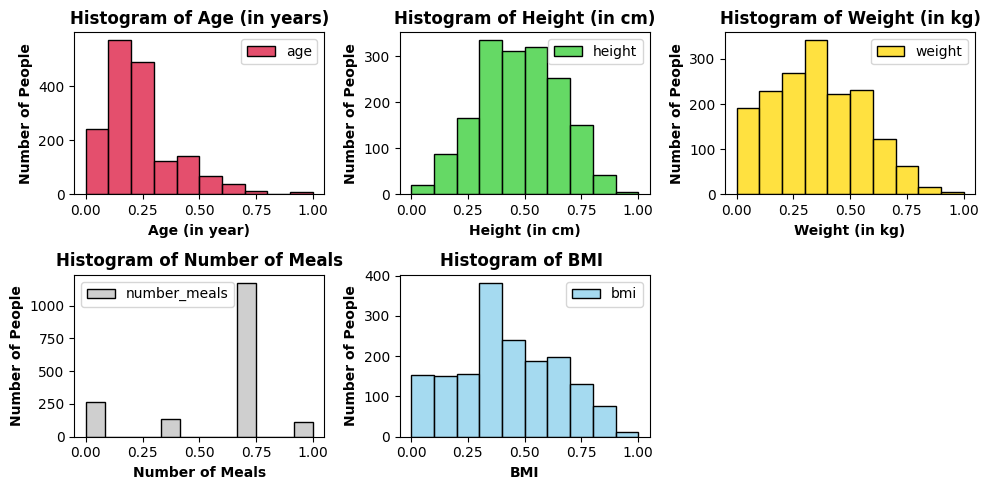

In [ ]:
# call the function to view the histogram
view_histogram(X_train_mm)

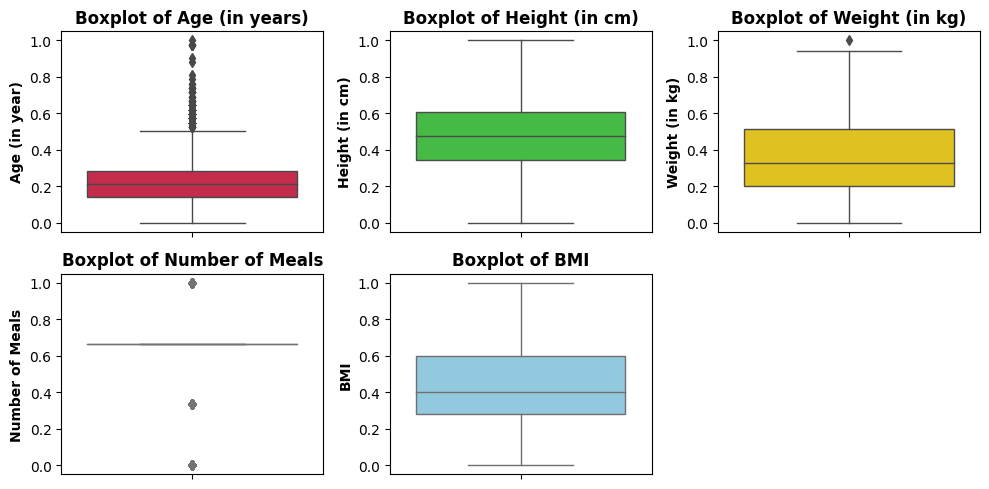

In [ ]:
# call the function to view the boxplot
view_boxplot(X_train_mm)

##### **(ii) Standard Scaler**

In [ ]:
# make a copy of the numerical feature training data
X_train_ss = X_train.copy()

In [ ]:
# initialize a standardscaler to normalize numerical features
standard_scaler = StandardScaler()
# normalizing numerical features in the training set using standard scaler using fit_transform method
X_train_ss[num_col_names] = standard_scaler.fit_transform(X_train_ss[num_col_names])

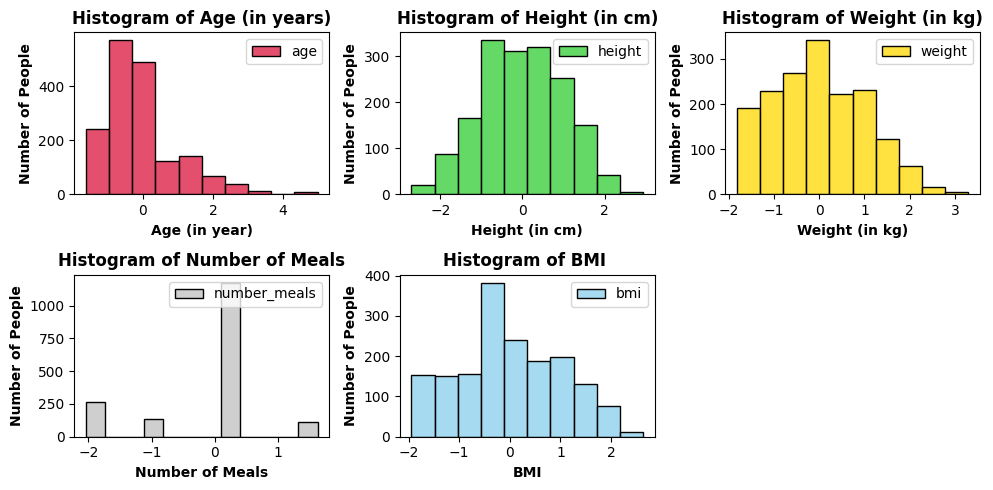

In [ ]:
# call the function to view the histogram
view_histogram(X_train_ss)

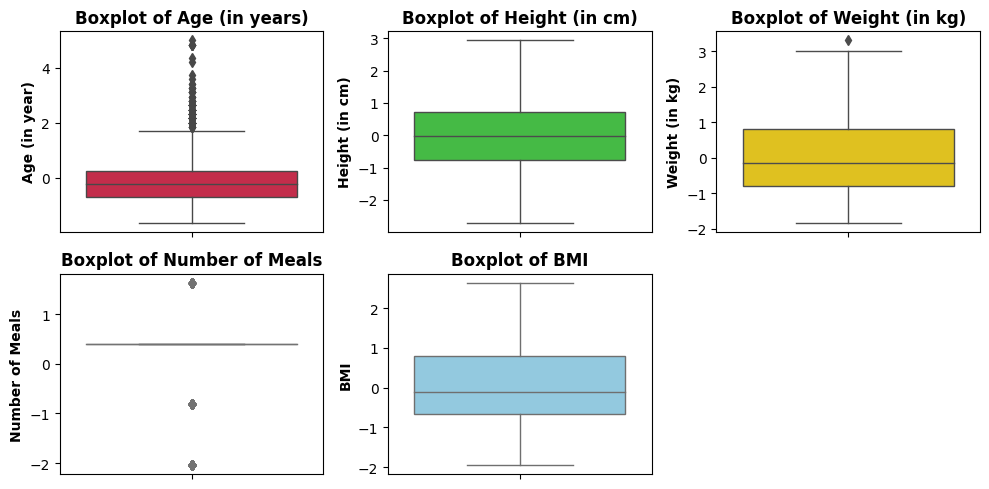

In [ ]:
# call the function to view the boxplot
view_boxplot(X_train_ss)

##### **(iii) Robust Scaler**

In [ ]:
# make a copy of the numerical feature training data
X_train_rs = X_train.copy()

In [ ]:
# initialize a robustscaler to normalize numerical features
robust_scaler = RobustScaler()
# normalizing numerical features in the training set using robust scaler using fit_transform method
X_train_rs[num_col_names] = robust_scaler.fit_transform(X_train_rs[num_col_names])

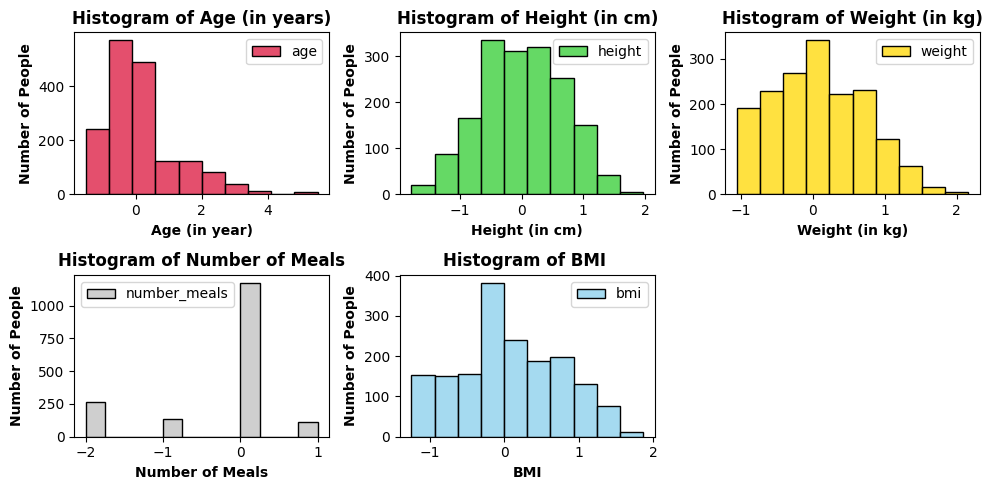

In [ ]:
# call the function to view the histogram
view_histogram(X_train_rs)

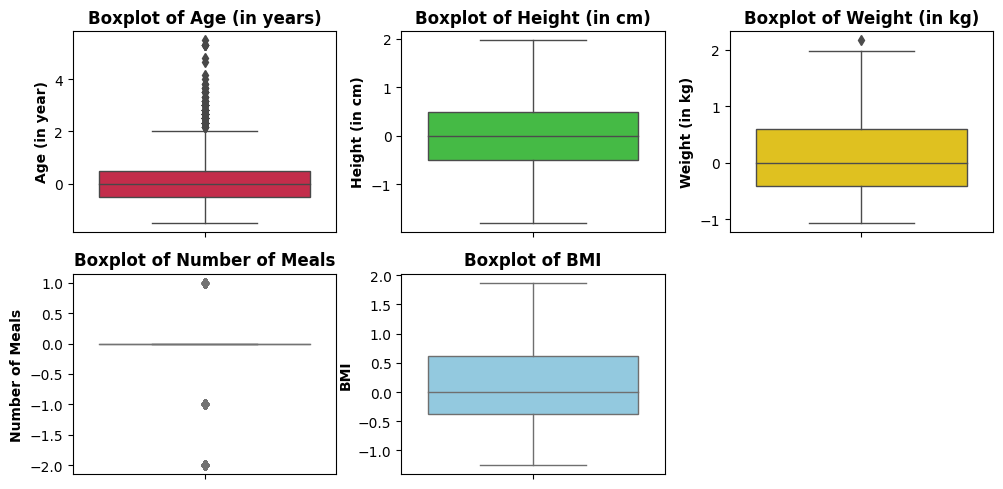

In [ ]:
# call the function to view the boxplot
view_boxplot(X_train_rs)

##### **(iv) PowerTransformer**

In [ ]:
# make a copy of the numerical feature training data
X_train_pt = X_train.copy()

In [ ]:
# initialize a power transformer to normalize numerical features
power_transformer = PowerTransformer(method='yeo-johnson')
# normalizing numerical features in the training set using power transformer using fit_transform method
X_train_pt[num_col_names] = power_transformer.fit_transform(X_train_pt[num_col_names])

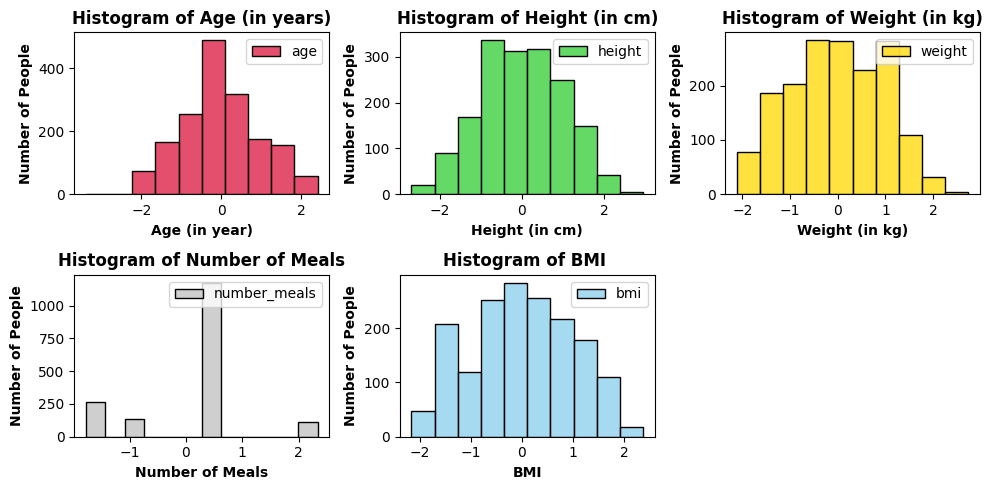

In [ ]:
# call the function to view the histogram
view_histogram(X_train_pt)

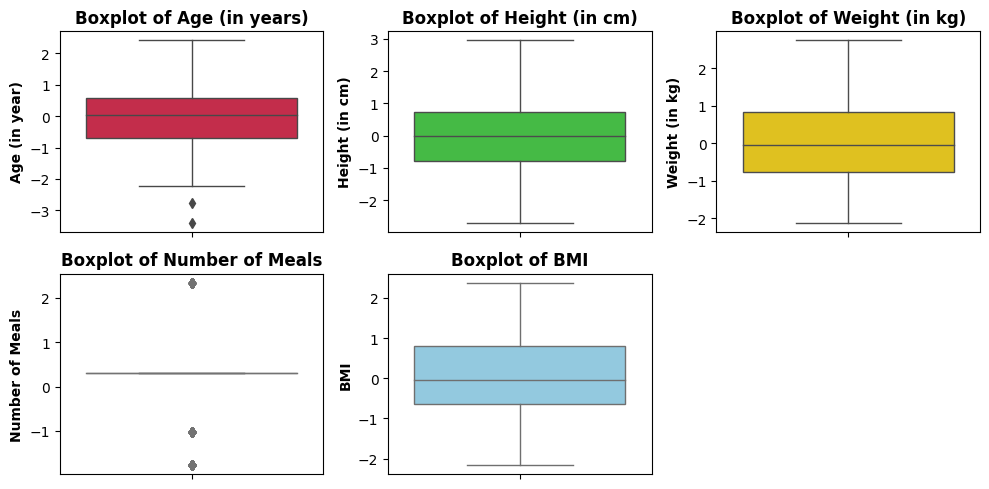

In [ ]:
# call the function to view the boxplot
view_boxplot(X_train_pt)

##### **(v) QuantileTransformer**

In [ ]:
# make a copy of the numerical feature training data
X_train_qt = X_train.copy()

In [ ]:
# initialize a quantiletransformer to normalize numerical features
quantile_transformer = QuantileTransformer(n_quantiles = 20, output_distribution = "normal")
# normalizing numerical features in the training set using quantile transformer using fit_transform method
X_train_qt[num_col_names] = quantile_transformer.fit_transform(X_train_qt[num_col_names])

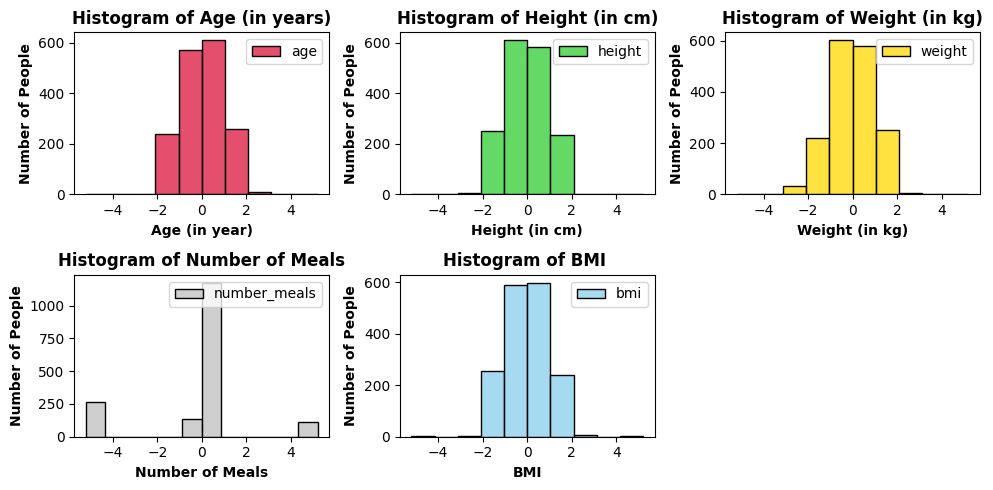

In [ ]:
# call the function to view the histogram
view_histogram(X_train_qt)

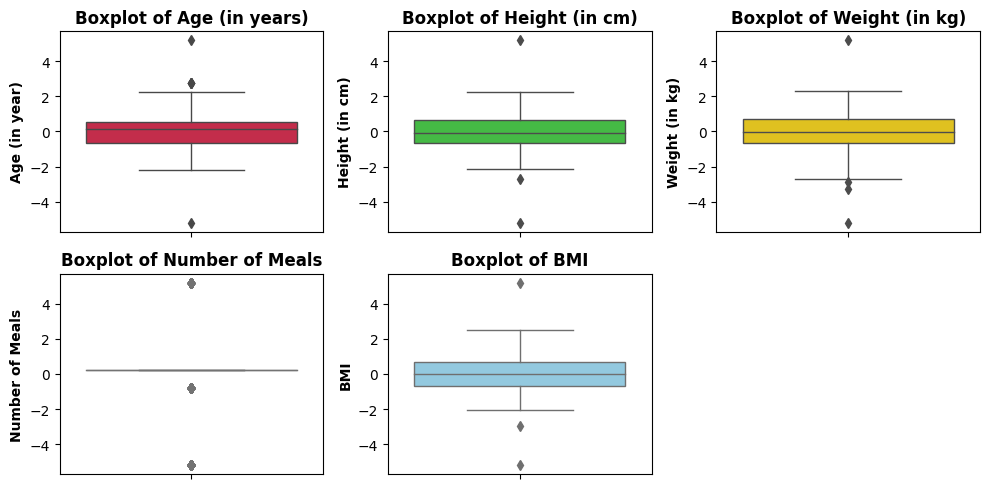

In [ ]:
# call the function to view the boxplot
view_boxplot(X_train_qt)

#### **Final Selection of Normalization and Scaling Technique**

In [ ]:
# initialize a quantiletransformer to normalize numerical features
power_transformer = PowerTransformer(method='yeo-johnson')
# normalizing numerical features in the training set using quantile transformer using fit_transform method
X_train[num_col_names] = power_transformer.fit_transform(X_train[num_col_names])
# normalizing numerical features in the testing set using the previously fitted QuantileTransformer
X_test[num_col_names] = power_transformer.transform(X_test[num_col_names])

In [ ]:
# display the normalize numerical features for training data
X_train.head()

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,bmi
0,Female,-0.418997,-0.880606,-0.847174,yes,no,frequently,0.304430,sometimes,no,sometimes,no,not always,frequently,not always,public_transportation,-0.633026
2,Male,0.044030,1.049359,-0.295850,yes,no,frequently,0.304430,sometimes,no,sometimes,no,frequently,frequently,frequently,public_transportation,-0.717085
3,Male,0.725906,1.049359,0.094331,no,no,often,0.304430,sometimes,no,sometimes,no,frequently,sometimes,frequently,walking,-0.307815
4,Male,-0.174673,0.834137,0.199123,no,no,frequently,-1.773055,sometimes,no,sometimes,no,not always,sometimes,sometimes,public_transportation,-0.117228
5,Male,0.982251,-0.880606,-1.363716,no,yes,frequently,0.304430,sometimes,no,sometimes,no,not always,sometimes,sometimes,automobile,-1.219205


In [ ]:
# display the normalize numerical features for testing data
X_test.head()

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,bmi
1,Female,-0.418997,-1.945777,-1.217464,yes,no,often,0.304430,sometimes,yes,frequently,yes,always,sometimes,sometimes,public_transportation,-0.653015
11,Female,-0.418997,0.189631,-0.176023,yes,yes,frequently,0.304430,frequently,no,sometimes,yes,frequently,frequently,sometimes,public_transportation,-0.283306
16,Male,0.725906,2.452907,0.636010,yes,yes,frequently,-1.773055,sometimes,no,not always,no,sometimes,sometimes,sometimes,public_transportation,-0.239368
28,Male,-1.003045,0.511666,-0.336359,yes,yes,often,0.304430,sometimes,no,sometimes,yes,always,frequently,sometimes,public_transportation,-0.575377
38,Male,0.044030,-0.560059,-0.714876,yes,yes,frequently,0.304430,sometimes,no,sometimes,no,sometimes,frequently,sometimes,public_transportation,-0.603035


### **(E) Unveiling Insights: Navigating Categorical Features through Exploratory Feature Analysis and Empowering Transformation with Label Encoding**

 **Categorical Features: Distribution of gender, family history with overweight, caloric food, vegetables, food between meals, smoke, water, calories, activity, technology, alcohol, and transportation with respect to obesity class**

In [ ]:
train_df = pd.concat([X_train, y_train], axis = 1)
train_df.head()

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,bmi,obesity_class
0,Female,-0.418997,-0.880606,-0.847174,yes,no,frequently,0.304430,sometimes,no,sometimes,no,not always,frequently,not always,public_transportation,-0.633026,normal_weight
2,Male,0.044030,1.049359,-0.295850,yes,no,frequently,0.304430,sometimes,no,sometimes,no,frequently,frequently,frequently,public_transportation,-0.717085,normal_weight
3,Male,0.725906,1.049359,0.094331,no,no,often,0.304430,sometimes,no,sometimes,no,frequently,sometimes,frequently,walking,-0.307815,overweight
4,Male,-0.174673,0.834137,0.199123,no,no,frequently,-1.773055,sometimes,no,sometimes,no,not always,sometimes,sometimes,public_transportation,-0.117228,overweight
5,Male,0.982251,-0.880606,-1.363716,no,yes,frequently,0.304430,sometimes,no,sometimes,no,not always,sometimes,sometimes,automobile,-1.219205,normal_weight


#### **(i) Visualizing the Distribution of Categorical Features with respect to Obesity Class**

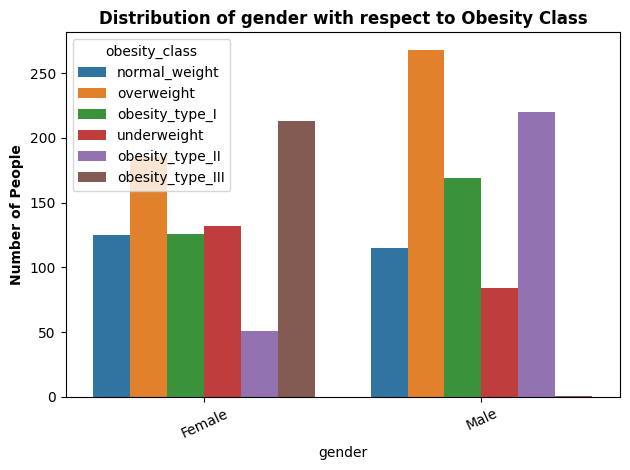

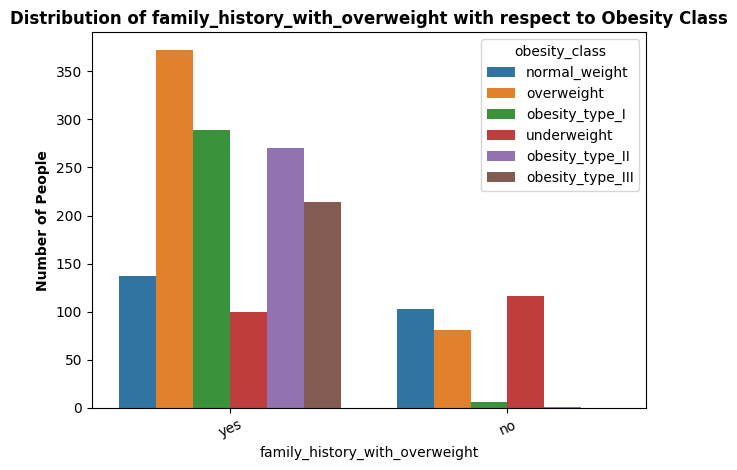

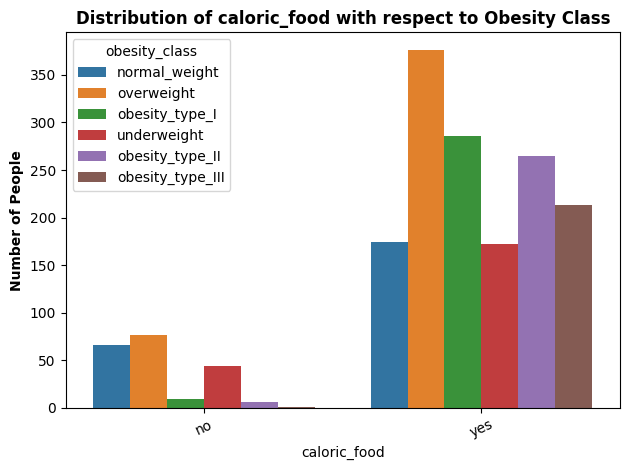

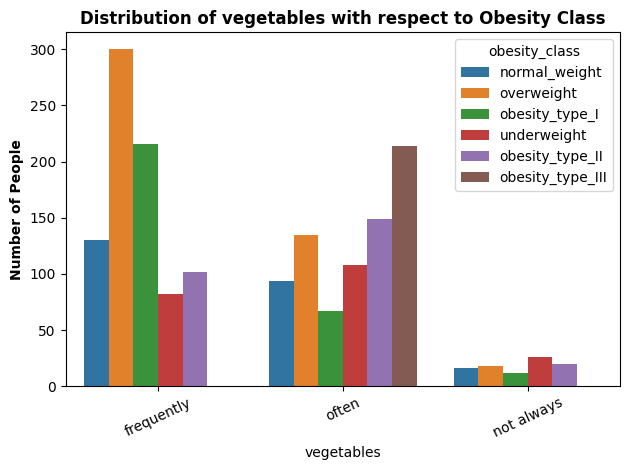

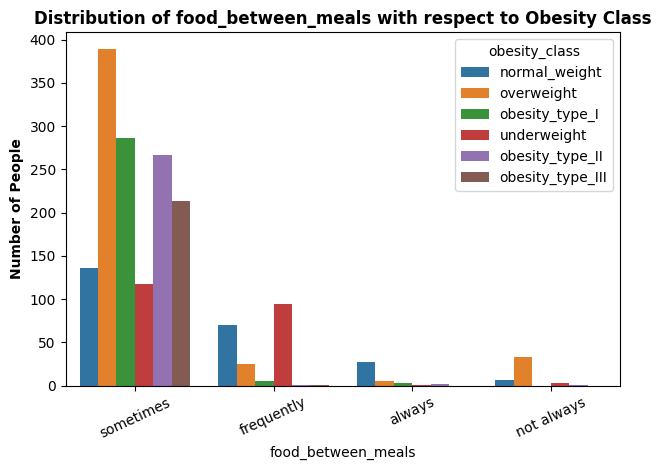

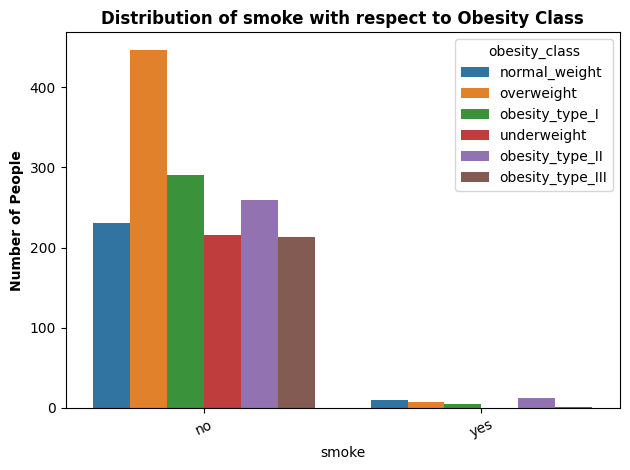

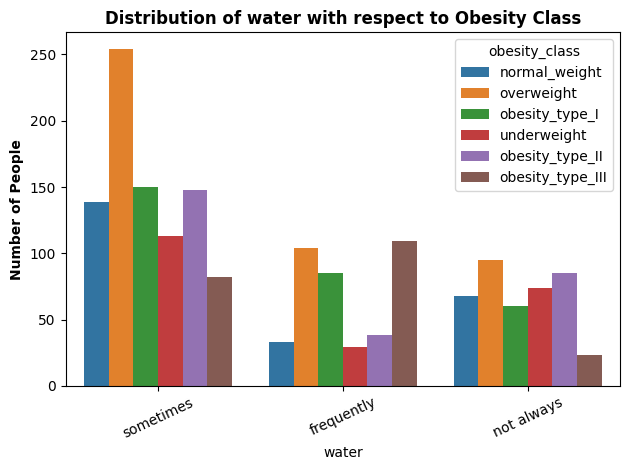

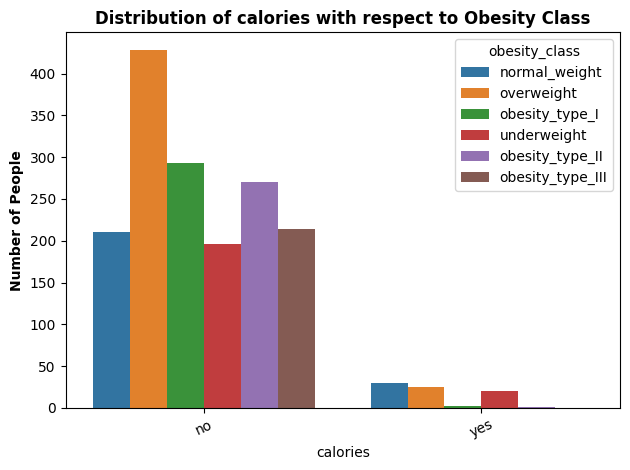

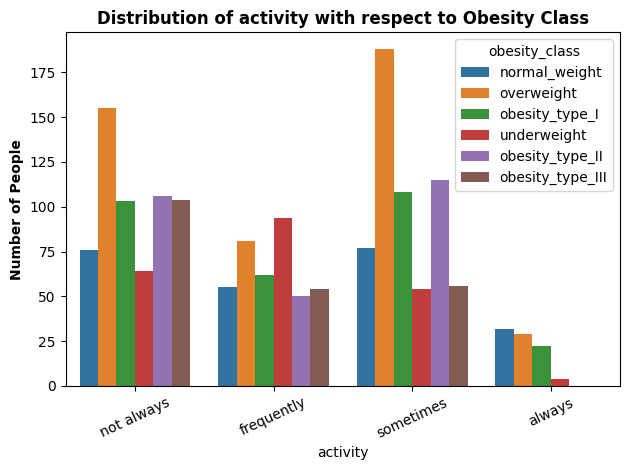

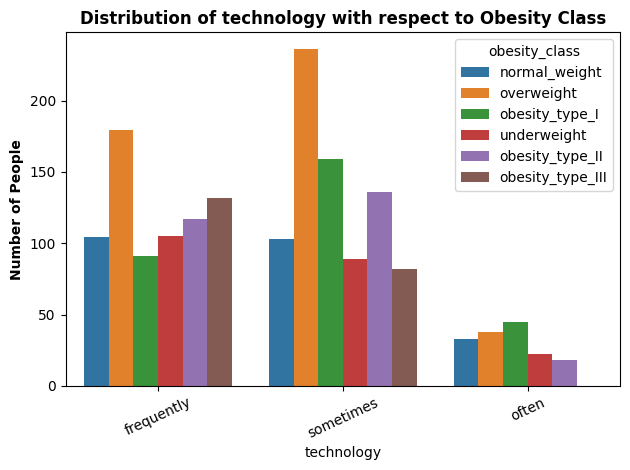

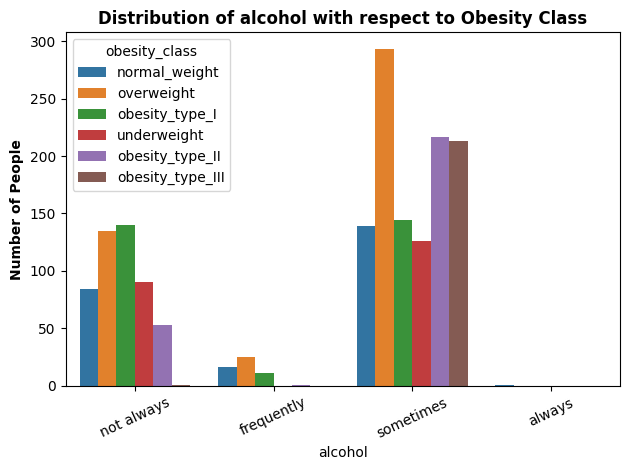

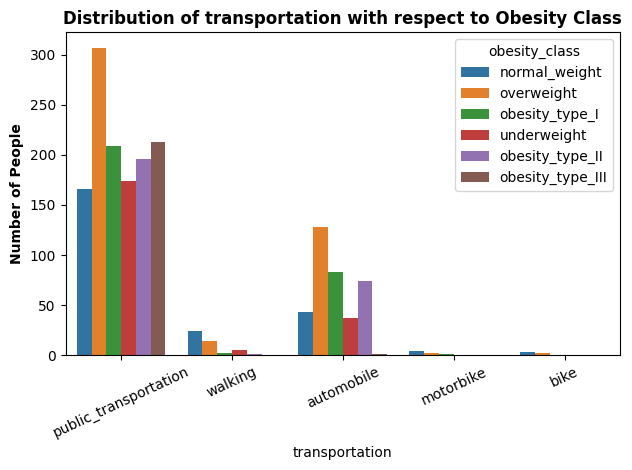

In [ ]:
for cat_name in cat_col_names:
  if cat_name != 'obesity_class':
    sns.countplot(x = cat_name, data = train_df, hue = "obesity_class")
    plt.title("Distribution of " + cat_name + " with respect to Obesity Class", fontweight = "bold")
    plt.xlabel(cat_name)
    plt.ylabel("Number of People", fontweight = "bold")
    plt.xticks(rotation = 25)
    plt.tight_layout()
    plt.show()

#### **(ii) Visualizing the Distribution of Obesity Class**

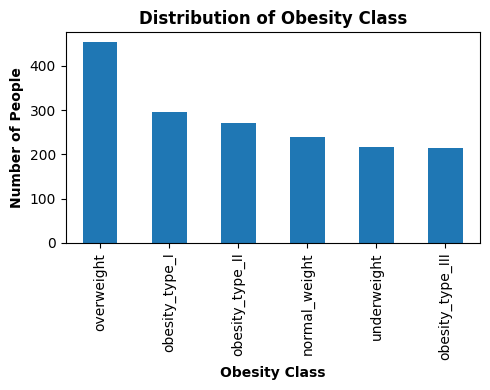

In [ ]:
# create a bar plot to visualize the distribution of obesity class labels
plt.figure(figsize = (5, 4))
y_train.value_counts().plot(kind = "bar")
plt.title("Distribution of Obesity Class", fontweight = "bold")
plt.xlabel("Obesity Class", fontweight = "bold")
plt.ylabel("Number of People", fontweight = "bold")
plt.tight_layout()
plt.show()

#### **(iii) Applying Transformation with Label Encoding**

In [ ]:
# initializing a LabelEncoder to encode categorical features
le = LabelEncoder()
# iterating through each categorical column in the training and testing sets
for name in cat_col_names:
  # encoding the categorical feature in both training and testing sets if it is not the target variable
  if name != 'obesity_class':
    X_train[name] = le.fit_transform(X_train[name])
    X_test[name] = le.transform(X_test[name])

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# display the encode categorical features for training data
X_train.head()

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,bmi
0,0,-0.418997,-0.880606,-0.847174,1,0,0,0.304430,3,0,2,0,2,0,2,3,-0.633026
2,1,0.044030,1.049359,-0.295850,1,0,0,0.304430,3,0,2,0,1,0,1,3,-0.717085
3,1,0.725906,1.049359,0.094331,0,0,2,0.304430,3,0,2,0,1,2,1,4,-0.307815
4,1,-0.174673,0.834137,0.199123,0,0,0,-1.773055,3,0,2,0,2,2,3,3,-0.117228
5,1,0.982251,-0.880606,-1.363716,0,1,0,0.304430,3,0,2,0,2,2,3,0,-1.219205


In [ ]:
# display the encode categorical features for testing data
X_test.head()

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,bmi
1,0,-0.418997,-1.945777,-1.217464,1,0,2,0.304430,3,1,0,1,0,2,3,3,-0.653015
11,0,-0.418997,0.189631,-0.176023,1,1,0,0.304430,1,0,2,1,1,0,3,3,-0.283306
16,1,0.725906,2.452907,0.636010,1,1,0,-1.773055,3,0,1,0,3,2,3,3,-0.239368
28,1,-1.003045,0.511666,-0.336359,1,1,2,0.304430,3,0,2,1,0,0,3,3,-0.575377
38,1,0.044030,-0.560059,-0.714876,1,1,0,0.304430,3,0,2,0,3,0,3,3,-0.603035


### **(F) Striking Balance: Exploring Hybrid Data Sampling Techniques through the Fusion of Oversampling and Undersampling for Imbalanced Class Handling**

In [ ]:
# initializing smote-tomek for resampling to address imbalanced class labels
smt = SMOTETomek(random_state = 42)
# applying smote-tomek to the training data to balance the class distribution
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

# initializing smote-enn for resampling to address imbalanced class labels
smtenn = SMOTEENN(random_state = 42)
# applying smote-enn to the training data to balance the class distribution
X_train_smtenn, y_train_smtenn = smtenn.fit_resample(X_train, y_train)

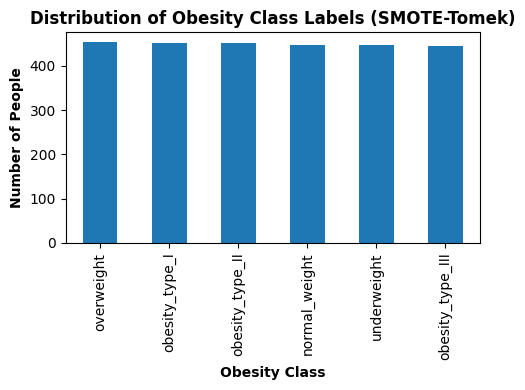

In [ ]:
# 3: overweight, 5: obesity_type_I, 2: obesity_type_II, 0: normal_weight, 1: underweight, 4: obesity_type_III
# create a bar plot to visualize the distribution of obesity class labels after applying smote-tomek
plt.figure(figsize = (5, 4))
ax = pd.Series(y_train_smt).value_counts().plot(kind = "bar")
plt.title("Distribution of Obesity Class Labels (SMOTE-Tomek)", fontweight = "bold")
plt.xlabel("Obesity Class", fontweight = "bold")
plt.ylabel("Number of People", fontweight = "bold")
ax.set_xticklabels(['overweight', 'obesity_type_I', 'obesity_type_II', 'normal_weight', 'underweight', 'obesity_type_III'])
plt.tight_layout()
plt.show()

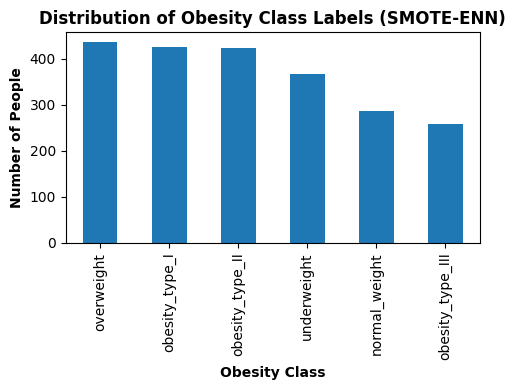

In [ ]:
# 3: overweight, 5: obesity_type_I, 2: obesity_type_II, 0: normal_weight, 1: underweight, 4: obesity_type_III
# create a bar plot to visualize the distribution of obesity class labels after applying smote-enn
plt.figure(figsize = (5, 4))
ax = pd.Series(y_train_smtenn).value_counts().plot(kind = "bar")
plt.title("Distribution of Obesity Class Labels (SMOTE-ENN)", fontweight = "bold")
plt.xlabel("Obesity Class", fontweight = "bold")
plt.ylabel("Number of People", fontweight = "bold")
ax.set_xticklabels(['overweight', 'obesity_type_I', 'obesity_type_II', 'underweight', 'normal_weight', 'obesity_type_III'])
plt.tight_layout()
plt.show()

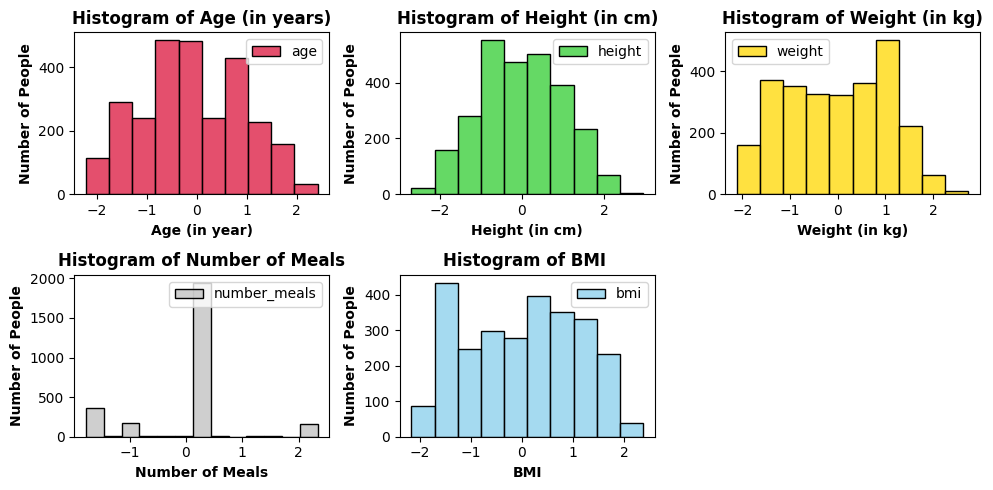

In [ ]:
view_histogram(X_train_smt)

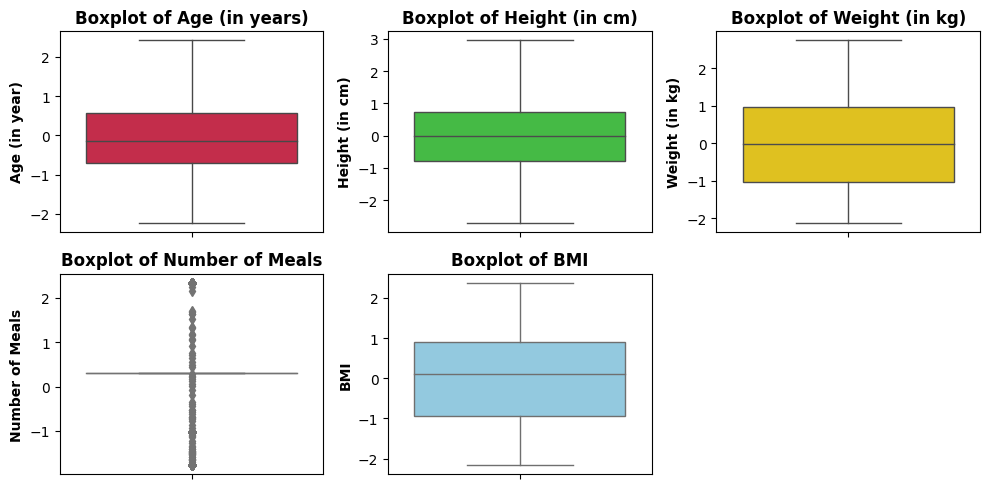

In [ ]:
view_boxplot(X_train_smt)

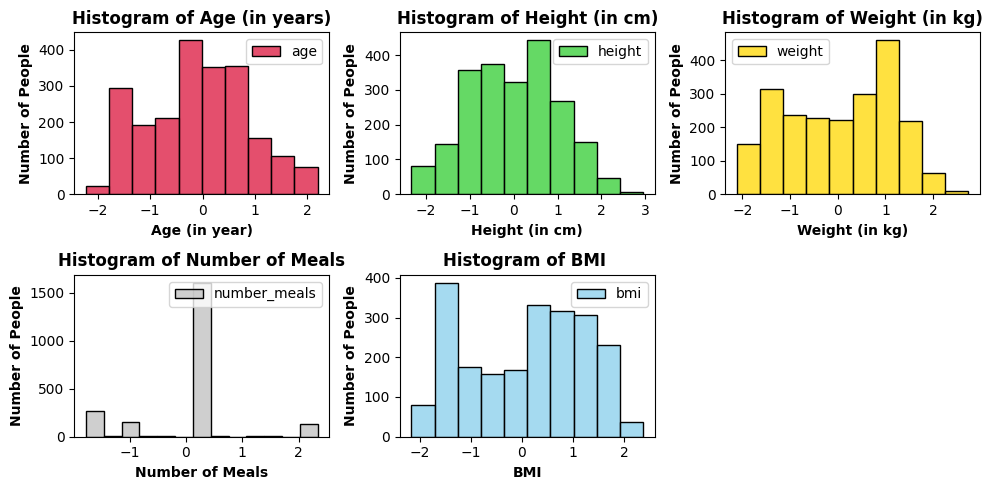

In [ ]:
view_histogram(X_train_smtenn)

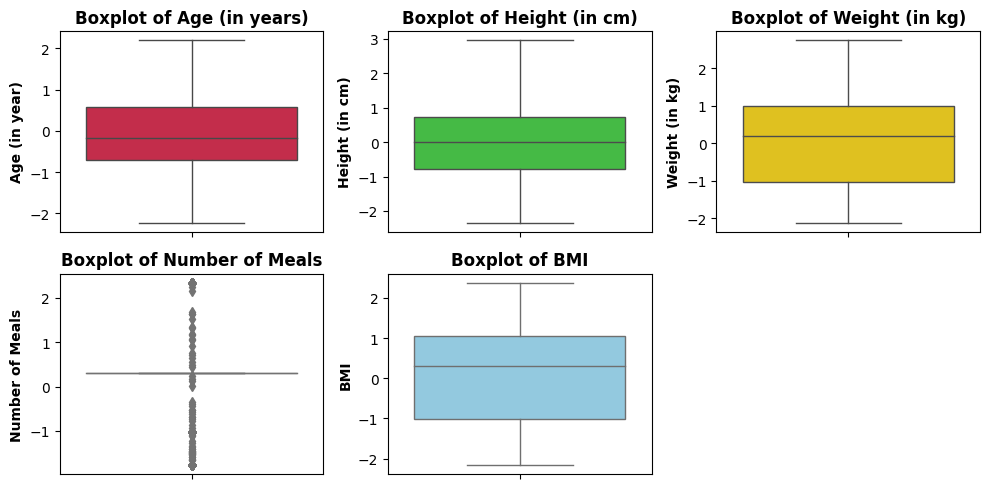

In [ ]:
view_boxplot(X_train_smtenn)

### **(G) Ensemble Mastery: Navigating Model Selection and Evaluation Strategies for Robust Ensemble Machine Learning**



###### 3: overweight, 5: obesity_type_I, 2: obesity_type_II, 0: normal_weight, 1: underweight, 4: obesity_type_III

In [ ]:
# perform cross-validation for the respective model using StratifiedKFold
def cross_validation_score(model, X_train_data, y_train_data):
  cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
  # define a scorer for evaluation during the cross-validation
  myScorer = make_scorer(balanced_accuracy_score)
  # calculate the balanced accuracy scores for each fold and store them in the form of array list
  scores = cross_val_score(model, X_train_data, y_train_data, cv=cv, n_jobs = 1, scoring = myScorer)
  # calculate the average balanced accuracy scores across all folds
  avgScores = np.mean(scores)
  return avgScores

In [ ]:
# perform cross-validation for the respective model using StratifiedKFold
def cross_validation_predict(model, X_test_data, y_test_data):
  cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
  # generate cross-validation prediction for the test data using the specified model
  y_pred = cross_val_predict(model, X_test_data, y_test_data, cv=cv, n_jobs = 1)
  return y_pred

In [ ]:
# display a heatmap of the confusion matrix with annotations and specific colormap for a given classification model
def confusionMatrix(title, y_true, y_predict):
    plt.figure(figsize = (10, 6))
    cf_matrix = confusion_matrix(y_true, y_predict)
    ax = sns.heatmap(cf_matrix, fmt = "", annot = True, cmap = "viridis")
    ax.set_title("Confusion Matrix for " + title, fontweight = "bold", fontsize = 10)
    ax.set_xticklabels(['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I'], rotation = 0)
    ax.set_yticklabels(['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I'], rotation = 0)
    plt.tight_layout()
    plt.show()

##### **1. Random Forest Classifier**

In [ ]:
# create a baseline random forest classifier
rfc = RandomForestClassifier(random_state = 42)

# call the function to calculate cross validation scores for the random forest classifier using datasets with SMOTE-Tomek and SMOTE-ENN resampling technique
rfc_scores_smt = cross_validation_score(rfc, X_train_smt, y_train_smt)
rfc_scores_smtenn = cross_validation_score(rfc, X_train_smtenn, y_train_smtenn)

# display the cross-validation scores for the random forest classifier
print("Random Forest Classifier CV-Scores with SMOTE-Tomek: {:.4f}".format(rfc_scores_smt))
print("Random Forest Classifier CV-Scores with SMOTE-ENN: {:.4f}".format(rfc_scores_smtenn))

Random Forest Classifier CV-Scores with SMOTE-Tomek: 0.9955
Random Forest Classifier CV-Scores with SMOTE-ENN: 0.9983


In [ ]:
# call the function to generate cross-validated predictions using random forest classifier for the dataset with SMOTE-Tomek and SMOTE-ENN resampling
rfc_y_pred_smt = cross_validation_predict(rfc, X_train_smt, y_train_smt)
rfc_y_pred_smtenn = cross_validation_predict(rfc, X_train_smtenn, y_train_smtenn)

In [ ]:
# display the classification report for random forest classifier (SMOTE-Tomek)
print("Classification Report for Random Forest Classifier (SMOTE-Tomek)")
print("------------------------------------------------------------------------")
print(classification_report(y_train_smt, rfc_y_pred_smt, target_names = ['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I']))

Classification Report for Random Forest Classifier (SMOTE-Tomek)
------------------------------------------------------------------------
                  precision    recall  f1-score   support

   normal_weight       1.00      0.99      0.99       447
     underweight       0.99      0.99      0.99       447
 obesity_type_II       1.00      0.99      1.00       451
      overweight       1.00      1.00      1.00       453
obesity_type_III       0.99      1.00      0.99       444
  obesity_type_I       1.00      1.00      1.00       452

        accuracy                           1.00      2694
       macro avg       1.00      1.00      1.00      2694
    weighted avg       1.00      1.00      1.00      2694



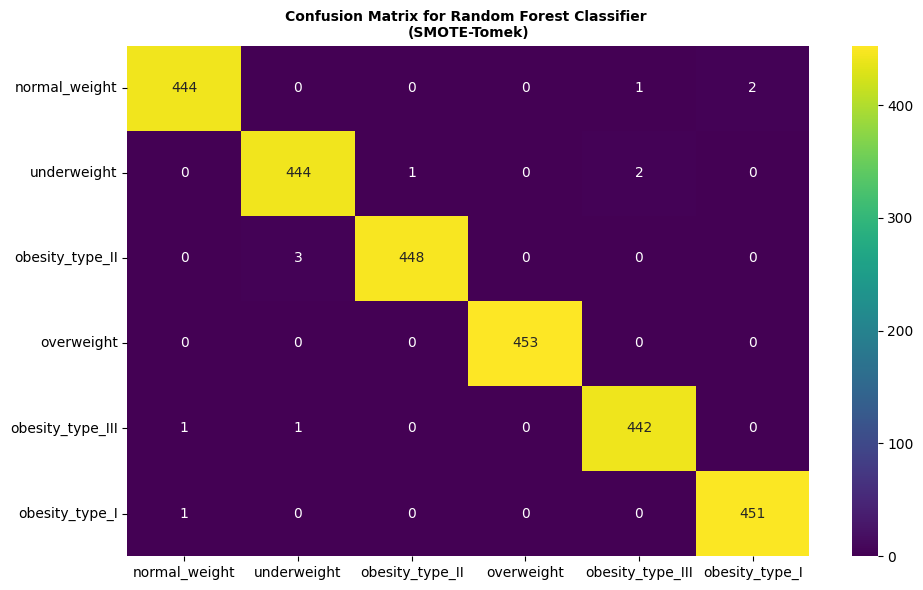

In [ ]:
# call the function to generate and display the confusion matrix for random forest classifier
confusionMatrix("Random Forest Classifier \n(SMOTE-Tomek)", y_train_smt, rfc_y_pred_smt)

In [ ]:
# display the classification report for random forest classifier (SMOTE-ENN)
print("Classification Report for Random Forest Classifier (SMOTE-ENN)")
print("------------------------------------------------------------------------")
print(classification_report(y_train_smtenn, rfc_y_pred_smtenn, target_names = ['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I']))

Classification Report for Random Forest Classifier (SMOTE-ENN)
------------------------------------------------------------------------
                  precision    recall  f1-score   support

   normal_weight       1.00      1.00      1.00       287
     underweight       1.00      1.00      1.00       367
 obesity_type_II       1.00      1.00      1.00       423
      overweight       1.00      1.00      1.00       435
obesity_type_III       1.00      0.99      1.00       258
  obesity_type_I       1.00      1.00      1.00       425

        accuracy                           1.00      2195
       macro avg       1.00      1.00      1.00      2195
    weighted avg       1.00      1.00      1.00      2195



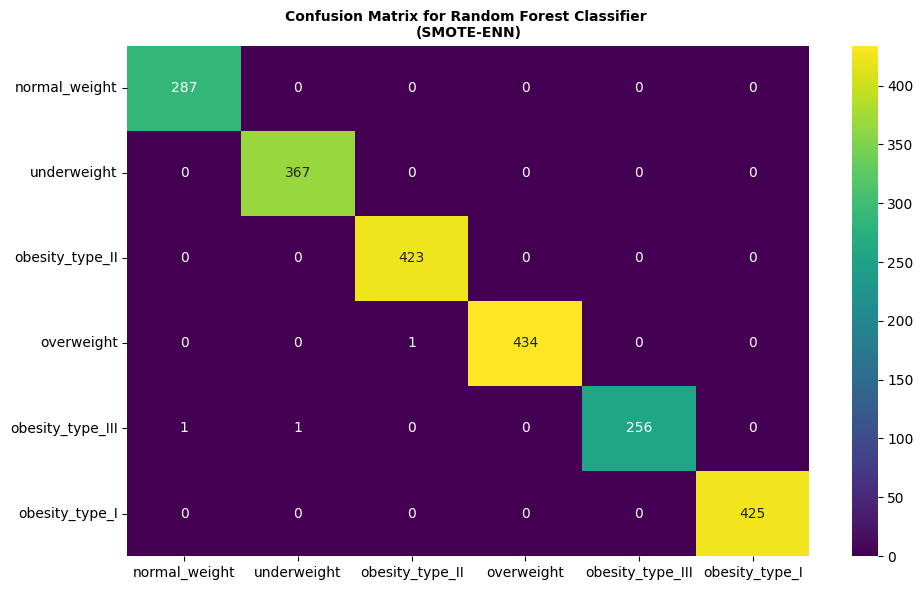

In [ ]:
# call the function to generate and display the confusion matrix for random forest classifier (SMOTE-ENN)
confusionMatrix("Random Forest Classifier \n(SMOTE-ENN)", y_train_smtenn, rfc_y_pred_smtenn)

##### **2. Gradient Boosting Classifier**

In [ ]:
# create a baseline gradient boosting classifier
gbc = GradientBoostingClassifier(random_state = 42)

# call the function to calculate cross validation scores for the gradient boosting classifier using datasets with SMOTE-Tomek and SMOTE-ENN resampling technique
gbc_scores_smt = cross_validation_score(gbc, X_train_smt, y_train_smt)
gbc_scores_smtenn = cross_validation_score(gbc, X_train_smtenn, y_train_smtenn)

# display the cross-validation scores for the gradient boosting classifier
print("Gradient Boosting Classifier CV-Scores with SMOTE-Tomek: {:.4f}".format(gbc_scores_smt))
print("Gradient Boosting Classifier CV-Scores with SMOTE-ENN: {:.4f}".format(gbc_scores_smtenn))

Gradient Boosting Classifier CV-Scores with SMOTE-Tomek: 0.9985
Gradient Boosting Classifier CV-Scores with SMOTE-ENN: 0.9984


In [ ]:
# call the function to generate cross-validated predictions using gradient boosting classifier for the dataset with SMOTE-Tomek and SMOTE-ENN resampling
gbc_y_pred_smt = cross_validation_predict(gbc, X_train_smt, y_train_smt)
gbc_y_pred_smtenn = cross_validation_predict(gbc, X_train_smtenn, y_train_smtenn)

In [ ]:
# display the classification report for gradient boosting classifier (SMOTE-Tomek)
print("Classification Report for Gradient Boosting Classifier (SMOTE-Tomek)")
print("------------------------------------------------------------------------")
print(classification_report(y_train_smt, gbc_y_pred_smt, target_names = ['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I']))

Classification Report for Gradient Boosting Classifier (SMOTE-Tomek)
------------------------------------------------------------------------
                  precision    recall  f1-score   support

   normal_weight       1.00      1.00      1.00       447
     underweight       1.00      1.00      1.00       447
 obesity_type_II       1.00      1.00      1.00       451
      overweight       1.00      1.00      1.00       453
obesity_type_III       1.00      0.99      1.00       444
  obesity_type_I       1.00      1.00      1.00       452

        accuracy                           1.00      2694
       macro avg       1.00      1.00      1.00      2694
    weighted avg       1.00      1.00      1.00      2694



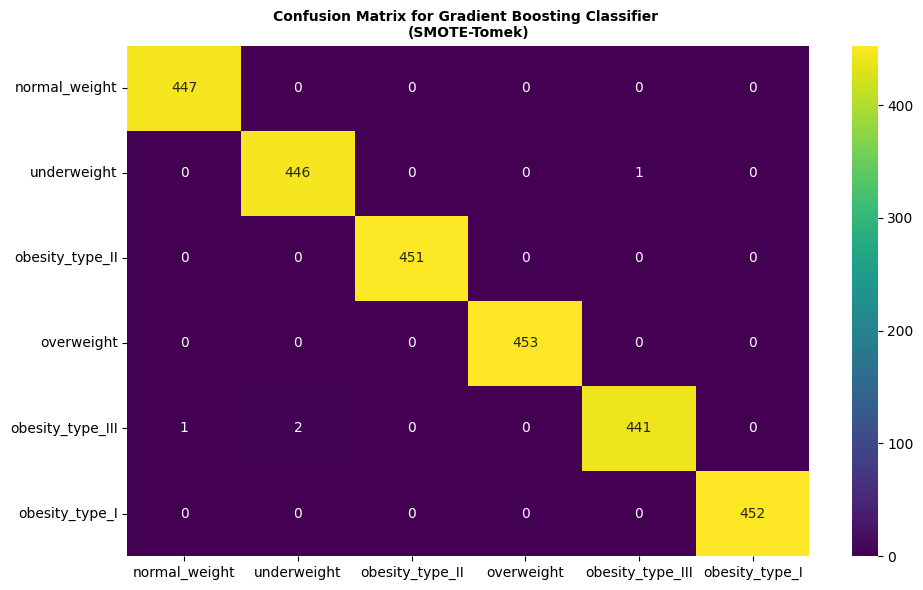

In [ ]:
# call the function to generate and display the confusion matrix for gradient boosting classifier (SMOTE-Tomek)
confusionMatrix("Gradient Boosting Classifier \n(SMOTE-Tomek)", y_train_smt, gbc_y_pred_smt)

In [ ]:
# display the classification report for gradient boosting classifier (SMOTE-ENN)
print("Classification Report for Gradient Boosting Classifier (SMOTE-ENN)")
print("------------------------------------------------------------------------")
print(classification_report(y_train_smtenn, gbc_y_pred_smtenn, target_names = ['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I']))

Classification Report for Gradient Boosting Classifier (SMOTE-ENN)
------------------------------------------------------------------------
                  precision    recall  f1-score   support

   normal_weight       1.00      1.00      1.00       287
     underweight       1.00      1.00      1.00       367
 obesity_type_II       1.00      1.00      1.00       423
      overweight       1.00      1.00      1.00       435
obesity_type_III       1.00      1.00      1.00       258
  obesity_type_I       1.00      1.00      1.00       425

        accuracy                           1.00      2195
       macro avg       1.00      1.00      1.00      2195
    weighted avg       1.00      1.00      1.00      2195



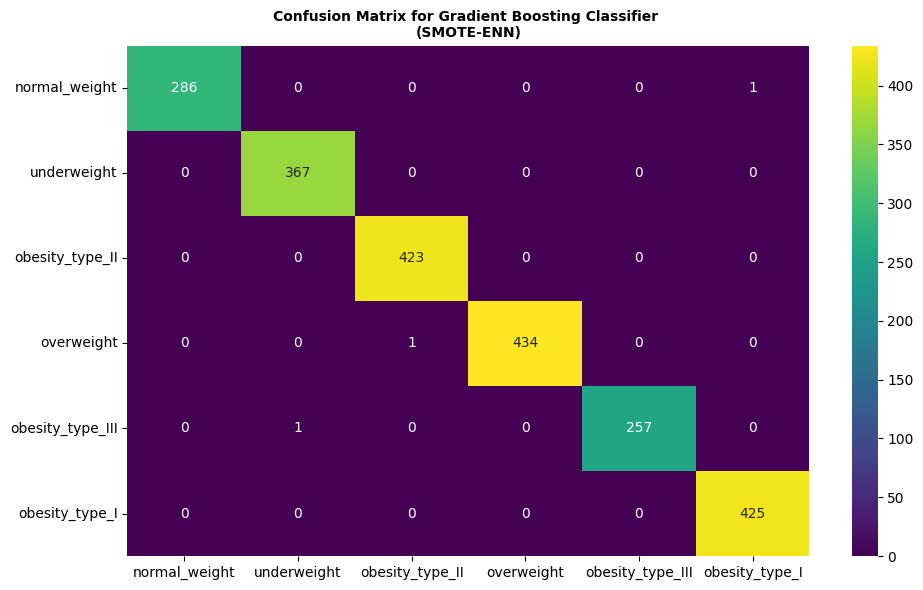

In [ ]:
# call the function to generate and display the confusion matrix for gradient boosting classifier (SMOTE-ENN)
confusionMatrix("Gradient Boosting Classifier \n(SMOTE-ENN)", y_train_smtenn, gbc_y_pred_smtenn)

##### **3. Extra Trees Classifier**

In [ ]:
# create a baseline extra trees classifier
etc = ExtraTreesClassifier(random_state = 42)

# call the function to calculate cross validation scores for the extra trees classifier using datasets with SMOTE-Tomek and SMOTE-ENN resampling technique
etc_scores_smt = cross_validation_score(etc, X_train_smt, y_train_smt)
etc_scores_smtenn = cross_validation_score(etc, X_train_smtenn, y_train_smtenn)

# display the cross-validation scores for the extra trees classifier
print("Extra Trees Classifier CV-Scores with SMOTE-Tomek: {:.4f}".format(etc_scores_smt))
print("Extra Trees Classifier CV-Scores with SMOTE-ENN: {:.4f}".format(etc_scores_smtenn))

Extra Trees Classifier CV-Scores with SMOTE-Tomek: 0.9821
Extra Trees Classifier CV-Scores with SMOTE-ENN: 0.9946


In [ ]:
# call the function to generate cross-validated predictions using extra trees classifier for the dataset with SMOTE-Tomek and SMOTE-ENN resampling
etc_y_pred_smt = cross_validation_predict(etc, X_train_smt, y_train_smt)
etc_y_pred_smtenn = cross_validation_predict(etc, X_train_smtenn, y_train_smtenn)

In [ ]:
# display the classification report for extra trees classifier (SMOTE-Tomek)
print("Classification Report for Extra Trees Classifier (SMOTE-Tomek)")
print("------------------------------------------------------------------------")
print(classification_report(y_train_smt, etc_y_pred_smt, target_names = ['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I']))

Classification Report for Extra Trees Classifier (SMOTE-Tomek)
------------------------------------------------------------------------
                  precision    recall  f1-score   support

   normal_weight       0.96      0.97      0.96       447
     underweight       0.99      0.99      0.99       447
 obesity_type_II       0.99      0.99      0.99       451
      overweight       1.00      1.00      1.00       453
obesity_type_III       0.97      0.96      0.96       444
  obesity_type_I       0.99      0.99      0.99       452

        accuracy                           0.98      2694
       macro avg       0.98      0.98      0.98      2694
    weighted avg       0.98      0.98      0.98      2694



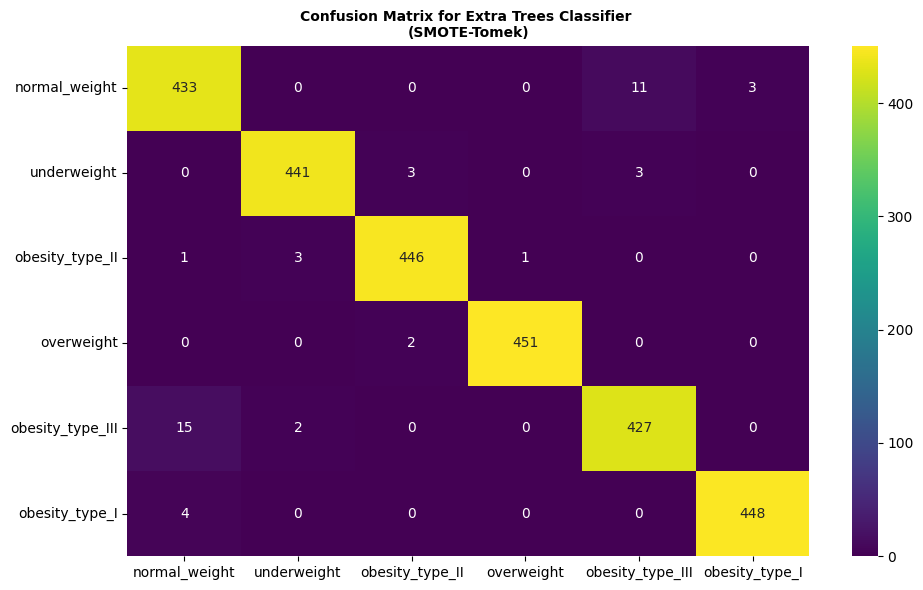

In [ ]:
# call the function to generate and display the confusion matrix for extra trees classifier (SMOTE-Tomek)
confusionMatrix("Extra Trees Classifier \n(SMOTE-Tomek)", y_train_smt, etc_y_pred_smt)

In [ ]:
# display the classification report for extra trees classifier (SMOTE-ENN)
print("Classification Report for Extra Trees Classifier (SMOTE-ENN)")
print("------------------------------------------------------------------------")
print(classification_report(y_train_smtenn, etc_y_pred_smtenn, target_names = ['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I']))

Classification Report for Extra Trees Classifier (SMOTE-ENN)
------------------------------------------------------------------------
                  precision    recall  f1-score   support

   normal_weight       0.98      1.00      0.99       287
     underweight       1.00      1.00      1.00       367
 obesity_type_II       0.99      1.00      1.00       423
      overweight       1.00      0.99      1.00       435
obesity_type_III       1.00      0.98      0.99       258
  obesity_type_I       1.00      0.99      1.00       425

        accuracy                           0.99      2195
       macro avg       0.99      0.99      0.99      2195
    weighted avg       1.00      0.99      0.99      2195



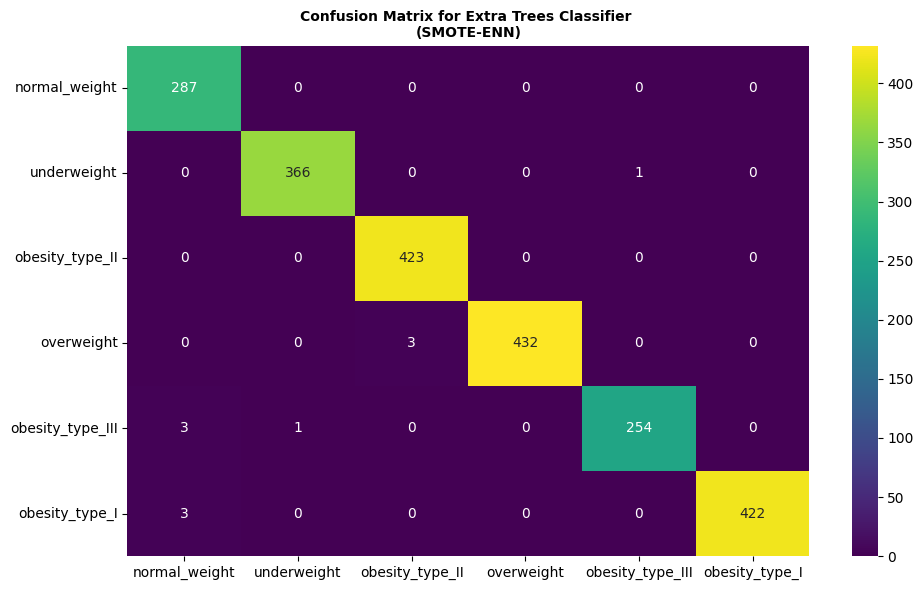

In [ ]:
# call the function to generate and display the confusion matrix for extra trees classifier (SMOTE-ENN)
confusionMatrix("Extra Trees Classifier \n(SMOTE-ENN)", y_train_smtenn, etc_y_pred_smtenn)

### **(H) Fine-Tuning the Forest: Exploring Optimal Performance with Hyperparameter Tuning for Random Forest Classifier**

In [ ]:
# define a parameter grid for hyperparameter tuning with GridSearchCV
param_grid = {'n_estimators': np.arange(50, 150, 10),
              'max_depth': [2, 3, 4],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': np.arange(2, 5),
              'min_samples_split': np.arange(1, 4)}

In [ ]:
# create a stratified k-fold for cross-validation object
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
# initialize a GridSearchCV object for hyperparameter tuning of a Random Forest classifier
rfc_smt_gs = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                             param_grid = param_grid,
                             cv = cv,
                             scoring = "accuracy",
                             verbose = 3,
                             return_train_score = True,
                             n_jobs = 1)
# fit the GridSearchCV object to the training data with SMOTE-Tomek resampling
rfc_smt_gs.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=60;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_sa

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([1, 2, 3]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140])},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# display the best score and best parameteres for random forest classifier
print("Best score for Random Forest Classifier (SMOTETomek): {:.4f}".format(rfc_smt_gs.best_score_))
print("Best parameters for Random Forest Classifier (SMOTETomek): \n{} ".format(rfc_smt_gs.best_params_))

Best score for Random Forest Classifier (SMOTETomek): 0.9922
Best parameters for Random Forest Classifier (SMOTETomek): 
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70} 


In [ ]:
# create a stratified k-fold for cross-validation object
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
# initialize a GridSearchCV object for hyperparameter tuning of a Random Forest classifier
rfc_smtenn_gs = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                             param_grid = param_grid,
                             cv = cv,
                             scoring = "accuracy",
                             verbose = 3,
                             return_train_score = True,
                             n_jobs = 1)
# fit the GridSearchCV object to the training data with feature selected using SMOTE-ENN resampling
rfc_smtenn_gs.fit(X_train_smtenn, y_train_smtenn)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=50;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, n_estimators=60;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_sa

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([1, 2, 3]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140])},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
# display the best score and best parameteres for random forest classifier
print("Best score for Random Forest Classifier (SMOTE-ENN + Feature Selected): {:.4f}".format(rfc_smtenn_gs.best_score_))
print("Best parameters for Random Forest Classifier (SMOTE-ENN + Feature Selected): \n{} ".format(rfc_smtenn_gs.best_params_))

### **(I) Evaluating Random Forest Classifier Performance with Optimized Hyperparameters on Test Data**

In [ ]:
# generate predictions on the test set using the random forest classifier with optimized hyperparameters and feature selected (SMOTE-Tomek)
y_pred_smt_gs = rfc_smt_gs.predict(X_test)

In [ ]:
# display the classification report
print("Classification Report for Random Forest Classifier \n(SMOTE-Tomek + Optimized Hyperparameters)")
print("----------------------------------------------------------------")
print(classification_report(y_test, y_pred_smt_gs, target_names = ['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I']))

Classification Report for Random Forest Classifier 
(SMOTE-Tomek + Optimized Hyperparameters)
----------------------------------------------------------------
                  precision    recall  f1-score   support

   normal_weight       0.98      1.00      0.99        60
     underweight       1.00      0.99      0.99        73
 obesity_type_II       0.99      1.00      0.99        67
      overweight       1.00      1.00      1.00        54
obesity_type_III       1.00      0.99      1.00       113
  obesity_type_I       1.00      1.00      1.00        55

        accuracy                           1.00       422
       macro avg       0.99      1.00      1.00       422
    weighted avg       1.00      1.00      1.00       422



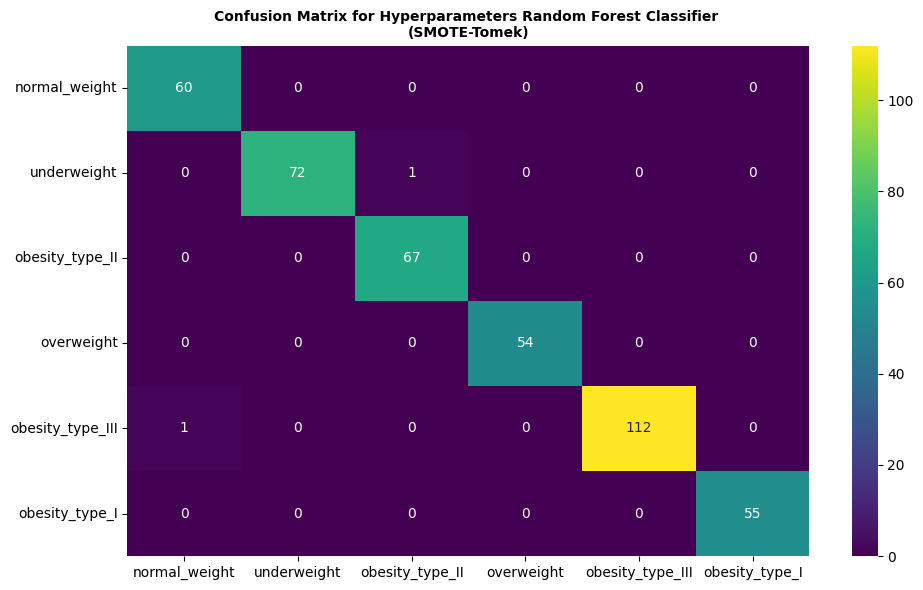

In [ ]:
# call the function to generate and display the confusion matrix for hyperparameters random forest classifier (SMOTE-Tomek + feature selection)
confusionMatrix("Hyperparameters Random Forest Classifier \n(SMOTE-Tomek)", y_test, y_pred_smt_gs)

In [ ]:
# generate predictions on the test set using the random forest classifier with optimized hyperparameters and feature selected (SMOTE-ENN)
y_pred_smtenn_gs = rfc_smtenn_gs.predict(X_test)

In [ ]:
# display the classification report
print("Classification Report for Random Forest Classifier \n(SMOTE-ENN + Optimized Hyperparameters)")
print("------------------------------------------------------------------")
print(classification_report(y_test, y_pred_smtenn_gs, target_names = ['normal_weight', 'underweight', 'obesity_type_II', 'overweight', 'obesity_type_III', 'obesity_type_I']))

Classification Report for Random Forest Classifier 
(SMOTE-ENN + Optimized Hyperparameters)
------------------------------------------------------------------
                  precision    recall  f1-score   support

   normal_weight       0.92      0.93      0.93        60
     underweight       1.00      0.99      0.99        73
 obesity_type_II       0.99      1.00      0.99        67
      overweight       1.00      1.00      1.00        54
obesity_type_III       0.99      0.96      0.97       113
  obesity_type_I       0.95      1.00      0.97        55

        accuracy                           0.98       422
       macro avg       0.97      0.98      0.98       422
    weighted avg       0.98      0.98      0.98       422



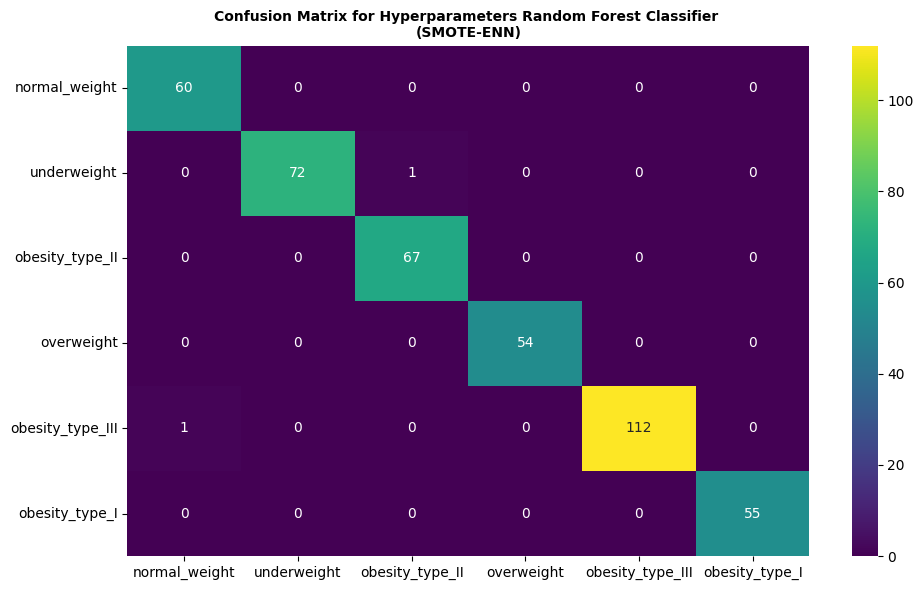

In [ ]:
# call the function to generate and display the confusion matrix for hyperparameters random forest classifier (SMOTE-ENN + feature selection)
confusionMatrix("Hyperparameters Random Forest Classifier \n(SMOTE-ENN)", y_test, y_pred_smt_gs)

### **(J) Preserving Predictive Power: Saving the Trained Random Forest Classifier for Future Use**

In [ ]:
import pickle
# save the trained random forest classifier with optimized hyperparameters
pickle.dump(rfc_smt_gs, open('/content/drive/MyDrive/rp_capstone_project/rfc_smt_fs_gs.pkl', 'wb'))